# fcc-MAGIC-exmple

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import imblearn

# Dataset was downloaded from here:
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


In [2]:
df = pd.read_csv('/Users/fahimeh/Projects/Data_science_prep/data/magic_telescope_dataset/magic04.data')
with open('/Users/fahimeh/Projects/Data_science_prep/data/magic_telescope_dataset/magic04.names') as f:
    print(f.read())

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

In [3]:
df.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist class  
0   6.3609  205.261     g  
1  76.9600  256.788     g  
2  10.4490  116.737     g  
3   4.6480  356.462     g  
4   3.6130  238.098     g

In [5]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [6]:
df['class'] = [1 if i == 'g' else 0 for i in df['class']]
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist  class  
0   6.3609  205.261      1  
1  76.9600  256.788      1  
2  10.4490  116.737      1  
3   4.6480  356.462      1  
4   3.6130  238.098      1

In [7]:
print(df.shape)
print(df[df['class'] == 1].shape)
print(df[df['class'] == 0].shape)

(19019, 11)
(12331, 11)
(6688, 11)


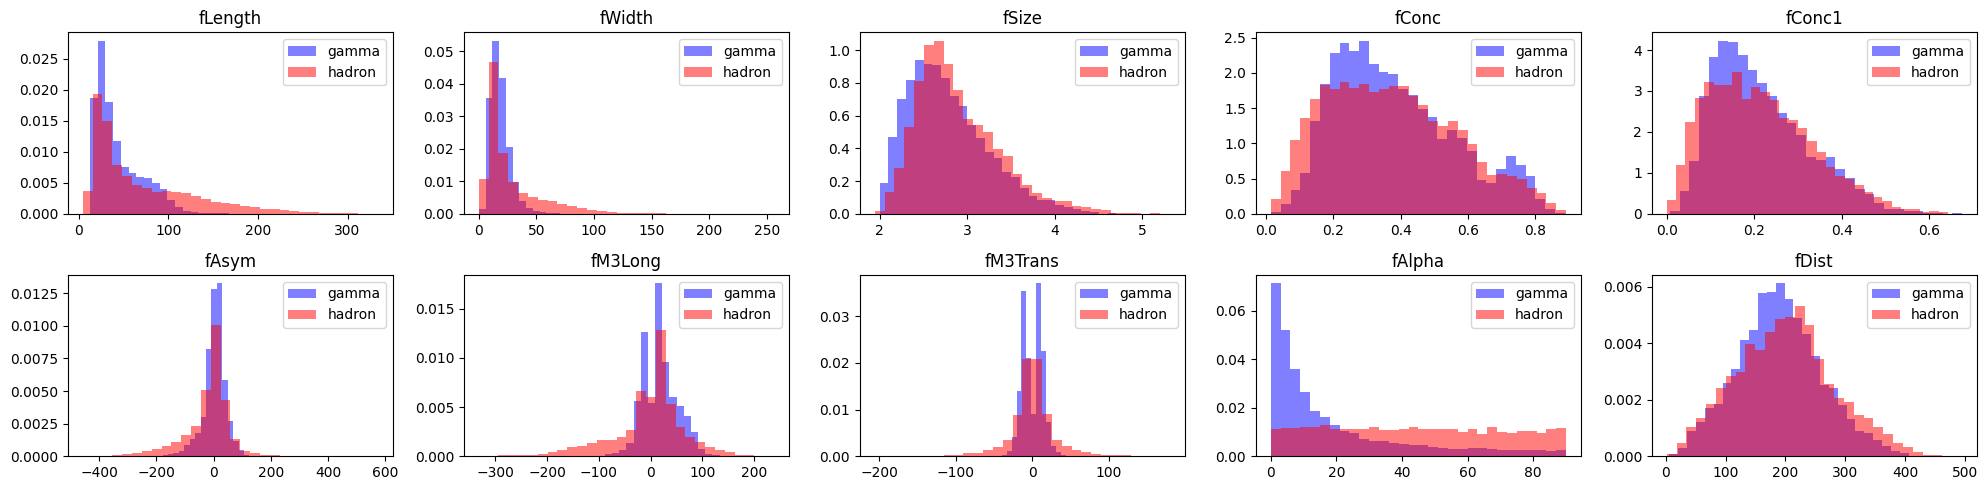

In [8]:
# Since the number of samples in two groups are not the same, we should normalize the histograms
# Therefore we use density=True in plt.hist

cols = df.columns[:-1]   # exclude 'class'
n_cols = 5
n_rows = int(len(cols) / n_cols) + (len(cols) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5))
axes = axes.flatten()

for i, c in enumerate(cols):
    axes[i].hist(df[df['class'] == 1][c], bins=30, alpha=0.5, label='gamma', color='blue', density=True)
    axes[i].hist(df[df['class'] == 0][c], bins=30, alpha=0.5, label='hadron', color='red', density=True)
    axes[i].set_title(c)
    axes[i].legend()

# # Hide empty subplots if columns don’t fill the grid
# for j in range(i + 1, len(axes)):
#     axes[j].axis('off')

plt.tight_layout()
plt.show()

In [9]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist  class  
0   6.3609  205.261      1  
1  76.9600  256.788      1  
2  10.4490  116.737      1  
3   4.6480  356.462      1  
4   3.6130  238.098      1

# Scale and over sample the data for training
Since number of data point for the two groups of gamma and hadron are not the same, we need to over sample for one group 

In [10]:
# First lets split the data to rain, test and validation sets
train, valid, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])
print(train.shape, valid.shape, test.shape)

(11411, 11) (3804, 11) (3804, 11)


/Users/fahimeh/miniconda3/envs/mlcc/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
# Then we need to scale and oversample and we can do it at the same time

def scale_oversample(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = sklearn.preprocessing.StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = imblearn.over_sampling.RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, y.reshape(-1, 1)))
    return data, X, y

In [12]:
# Before oversampling the data is imbalanced
print(train[train['class']==0].shape, train[train['class']==1].shape)
print(test[test['class']==0].shape, test[test['class']==1].shape)
print(valid[valid['class']==0].shape, valid[valid['class']==1].shape)

train, X_train, y_train = scale_oversample(train, oversample=True)
test, X_test, y_test = scale_oversample(test, oversample=False) # We dont oversample the test set because we want to see the real performance of the model on the test set
valid, X_valid, y_valid = scale_oversample(valid, oversample=False) # the same for validation set

print(len(y_train==1), len(y_train==0)) # Two classes should now have the same number of samples
print(len(y_test==1), len(y_test==0))
print(len(y_valid==1), len(y_valid==0))

(4004, 11) (7407, 11)
(1331, 11) (2473, 11)
(1353, 11) (2451, 11)
14814 14814
3804 3804
3804 3804


Okay, now we can say that out model is properly formatted. It is split between train and test and validation. It has been scaled and oversampled and it is ready to be used.

# kNN
knn  is when we look at the neighbors of a given points and we give the point the label of the majority of its nns. It is actually a classification method and since it is imbalanced dataset, it is very important to look at the precision and recall instead of just accuracy. becasue imagine that you have a big big class of ornages and only few apples. Then the best model is the model that puts eveything to the orange class, becasue that way the accuracy is very high due to the high number of ornage samples. However, presicion and recall are two important metrics for imbalanced dataset and they count the number of TP and FP and TN and FNs.

In [20]:
knn =  sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1331
           1       0.86      0.87      0.86      2473

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



We have Gaussian NB and mulinomial NB classifiers. For example the Gaussian NB which is used in this case takes the mean and the std of each column of the data or wach feature and then use a gaussian with that mean and std to represent that feature. Then when a new observation (x0, x1, x2, ..., xn) comes and we want to make a prediction, bayes rule is used. 

p(class1 | x0, x1, x2 ..., xn) ~ p(class1) * p(x0 | class1) * p(x2 | class1) * ... * p(xn| class1)

p(class2 | x0, x1, x2, ... xn) ~ p(class2) * p(x0 | class2) * p(x2 | class2) * ... * p(xn| class2)

p(class1) is the prior for class1 and p(class2) is the prior for class2. It is the frequncy of that class, so if we oversample the training data, then the priors are the oversampled ones. We can manually compute the priors and put them in the model but in the above exmaple we did not do that. 
for the p(xi | classj) we use the gaussians to compute. We find the value of the xi on the x axis of the gaussian function and then p(xi | classj) is the value of the gaussian on the y axis. It is also called the "likelihood". 
Note: if the value on the y axis is super small, then the likelihhod is very close to zero and that might cause numerical issues called underflow. To prevent that to happen, instead of the value itself we compute the log of the whole multiplication of the right side. so we do this:

log(p(classj | x0, x1, x2 ..., xn)) ~ log(p(classj) * p(x0 | classj) * p(x2 | classj) * ... * p(xn| classj))

log(p(classj | x0, x1, x2 ..., xn)) ~ log(p(classj)) + log(p(x0 | classj)) + ... + log(p(xn| classj))

After computing this for all classes, we put the new observation in the class which has higher value.

In the multinomial NB, we have different type of data. For example we want to classify our emails. For this case we compute the frequency of each word in each class and then compute the probability of seeing that word given that class. For example if we have seen word "Dear" 8 times and the total number of words in all the normal messges are 17, the p("Dear" | Normal messgae) = 8/17  and so on! So we compute all the likelihhods of each word and then we als have the priors of each class. for example if we have in total 20 messges and 15 are normal and 5 are spam then p(normal) = 15/20

Now when a new email comes, we see "Dear friend money money money" ... then we should compute the following:

p(normal | "Dear friend money money money") ~ p(normal) * p("Dear" | normal) * p("friend" | normal) * (p("money" | normal)) ** 3

p(spam | "Dear friend money money money") ~ p(spam) * p("Dear" | spam) * p("friend" | spam) * (p("money" | spam)) ** 3

whatever the outcome, we take the class with higher probability. The only thing is that if a word was not seen in a class then likelihood is zero and that is a problem becasue always the other class will be chosen for only one word with probability of zero. For that not to happen, we add 1 to all the frequencies in the histogram to make sure we have seen that word in both classes at least one.



# Logistic Regression

it is called a regression and not a classification becasue it first apply a linear regression to our data like: (mx + b)  and then perform logistic (sigmoid) function to that so it becomes like: 1/(1+e(-(mx + b)))

The sigmoid function changes between 0 and 1 and we can use it as a probability and therefore it is better than a straight line. If we have a straight line as our model then if our x is very close to that line the results jumps bwteen the two sides of the line. However if we have a sigmoid, the results dont jump and it is smooth. Moreover if we have a straight line, then the result between a x very close and one far from the line is the same, so we can not tell the confidence between our responses. while we might be very confident in predicting the lable of one x vs the other one. So that is why we use sigmoid instead of straight line.

Another thing for the sigmoid function, is what sigmoid line is good. with the linear regression we can compute the error and then move the line until we get the best fit. in sigmoid function we maximize the likelihood. we choose a sigmoid and then we find the likelihood of observing each point given that sigmoid. and then we multiply all os those likelihoods and then we change the sigmoid and compute agian and finally we choose a sigmoid that maximizez the likelihood of our data.

In [22]:
lg = sklearn.linear_model.LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1331
           1       0.85      0.82      0.83      2473

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines
In this method, not only it is important to make good prediction but also we pay attention to the point near the desicion boundry and we choose a model that has highest margins. the margin is the distance between the data points closest to the boundry line and the boundry line in all the classes. We want to have a line which is on the middle of our data point in both side of two classes, we dont want to be closer to one class with respect to other class. the data points closest to the boundy lines are called "support vectors".

In [23]:
svm = sklearn.svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1331
           1       0.90      0.90      0.90      2473

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Network

If we take all the input features, multiply them with different weights and then add them together and then add some biases and then take the output, it is not but a linear regression. However we use activation function in each layer such as RELU, sigmoid or tanh inorder to make this a non-linear transfomration of input data.

We define a loss function and thanks to gradient descent we can find the derivative of the loss function with respect to each wieght and then for each weight we will do this: 

w0_new = w0_old + alpha * gradient of loss for w0  

and so on for each w matrix. this step is called back propagation and we are looking for the min of the loss funtion for each of the weights. 

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=32, dropout_rate=0.5):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.out = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.out(x))
        return x

In [16]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.reshape(-1, 1))
X_test_tensor = torch.FloatTensor(X_test)   
y_test_tensor = torch.FloatTensor(y_test.reshape(-1, 1))
X_valid_tensor = torch.FloatTensor(X_valid)
y_valid_tensor = torch.FloatTensor(y_valid.reshape(-1, 1))

In [17]:
def plot_metrics(train_loss, valid_loss, train_acc=None, valid_acc=None):
    epochs = range(1, len(train_loss) + 1)
    
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss', color='steelblue', linewidth=2)
    plt.plot(epochs, valid_loss, label='Validation Loss', color='orange', linewidth=2, linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Accuracy plot
    if train_acc is not None and valid_acc is not None:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_acc, label='Train Accuracy', color='green', linewidth=2)
        plt.plot(epochs, valid_acc, label='Validation Accuracy', color='red', linewidth=2, linestyle='--')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy over Epochs')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

In [20]:
import torch

def model_train_split(X_train, y_train, X_test, y_test, model, criterion, optimizer, n_epochs=100, batch_size=32, val_frac=0.2, verbose=True):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []

    n_samples = X_train.size(0)
    val_size = int(n_samples * val_frac)

    for epoch in range(n_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch in range(0, X_train.size(0), batch_size):
            X_batch = X_train[batch:batch+batch_size]
            y_batch = y_train[batch:batch+batch_size]

            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * X_batch.size(0)
            correct += ((y_pred > 0.5).float() == y_batch).sum().item()
            total += y_batch.size(0)

        train_loss = running_loss / total
        train_acc = correct / total

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_test)
            valid_loss = criterion(y_val_pred, y_test).item()
            valid_acc = ((y_val_pred > 0.5).float() == y_test).float().mean().item()

        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        if verbose and (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
                  f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Training with hidden_dim=16, batch_size=32, lr=0.01, dropout_rate=0.0


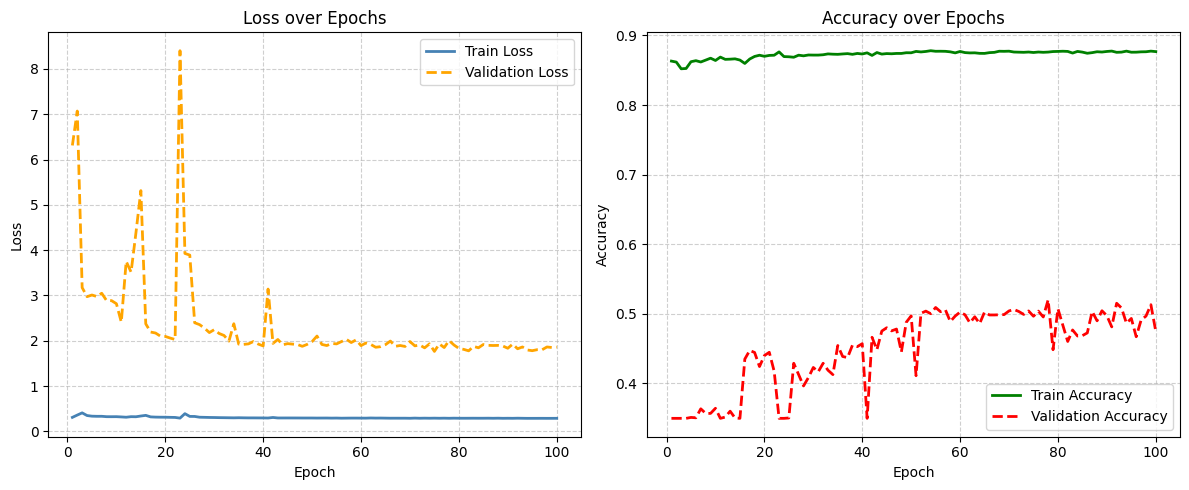

Final validation Accuracy: 0.4810725450515747
Training with hidden_dim=16, batch_size=32, lr=0.01, dropout_rate=0.2


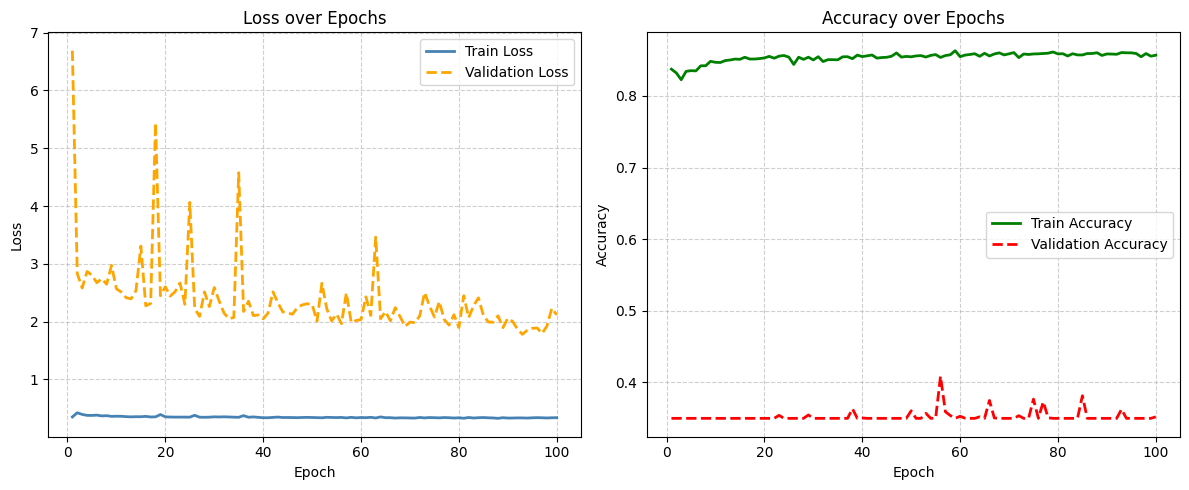

Final validation Accuracy: 0.3564668893814087
Training with hidden_dim=16, batch_size=32, lr=0.005, dropout_rate=0.0


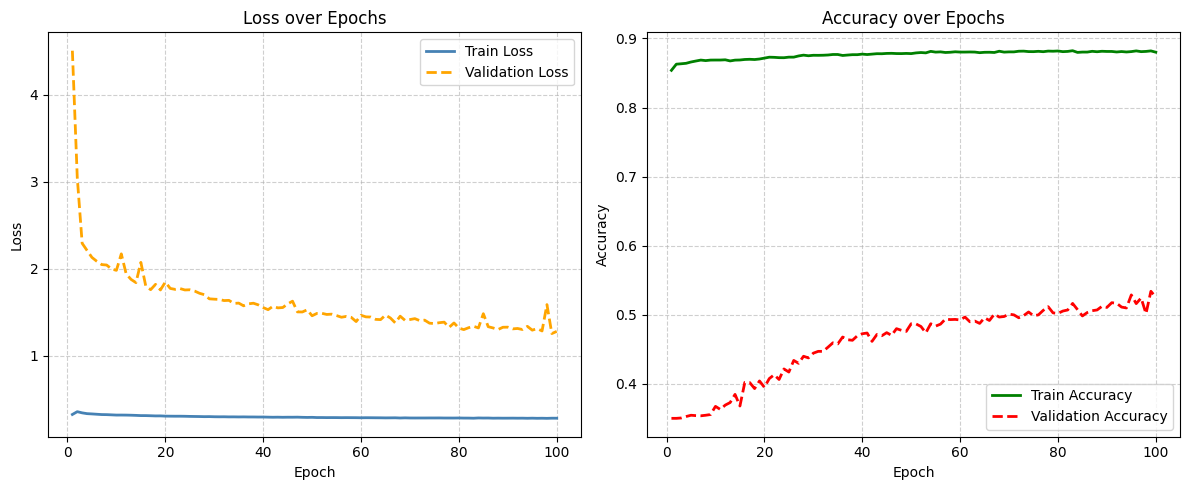

Final validation Accuracy: 0.530494213104248
Training with hidden_dim=16, batch_size=32, lr=0.005, dropout_rate=0.2


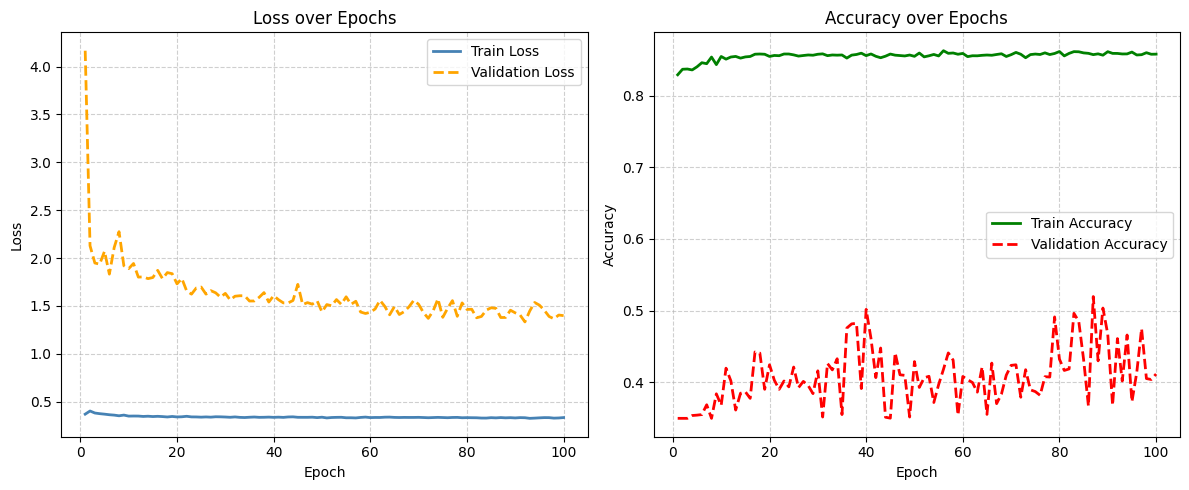

Final validation Accuracy: 0.4153522551059723
Training with hidden_dim=16, batch_size=32, lr=0.001, dropout_rate=0.0


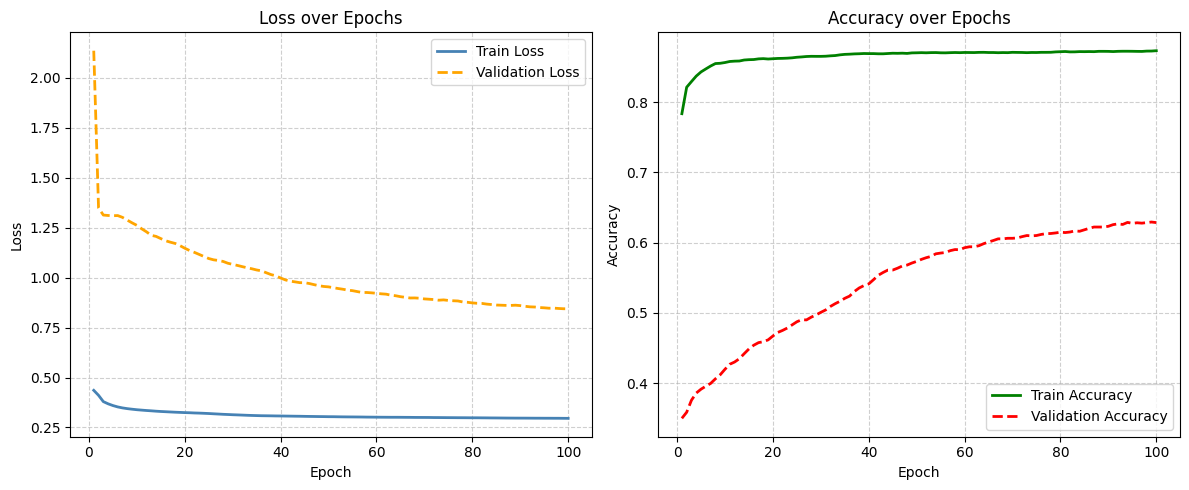

Final validation Accuracy: 0.6248685717582703
Training with hidden_dim=16, batch_size=32, lr=0.001, dropout_rate=0.2


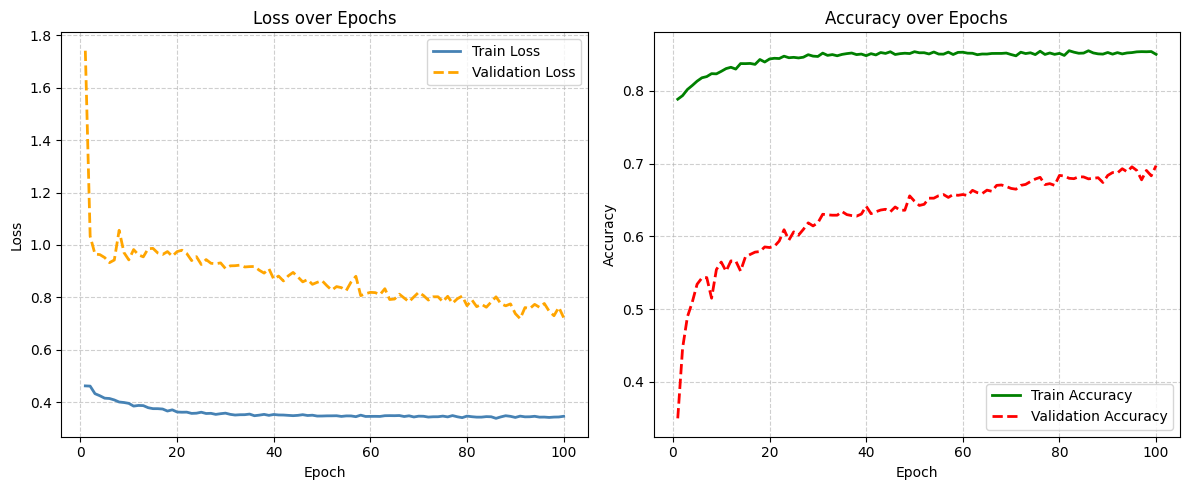

Final validation Accuracy: 0.6837539672851562
Training with hidden_dim=16, batch_size=64, lr=0.01, dropout_rate=0.0


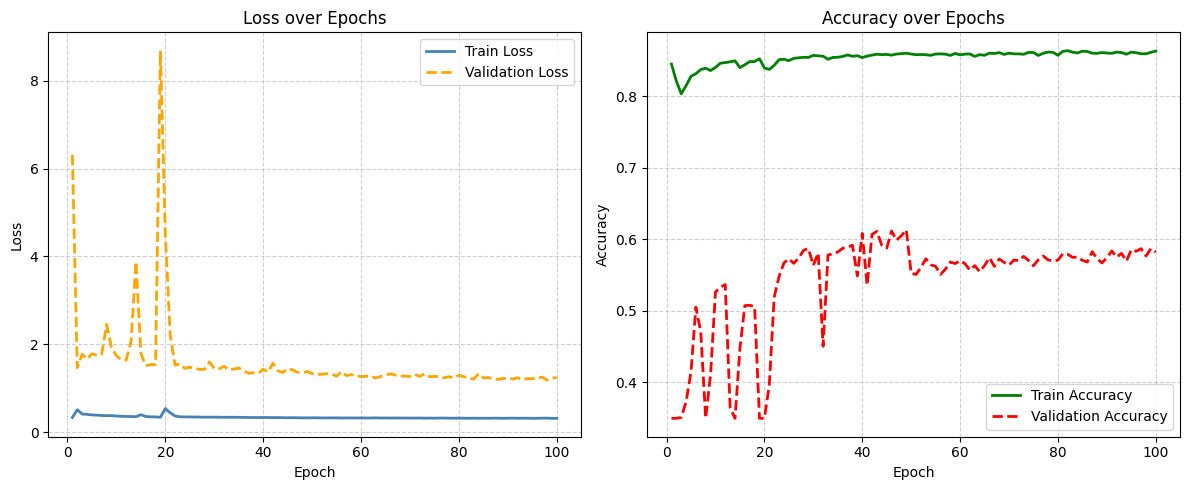

Final validation Accuracy: 0.5694006085395813
Training with hidden_dim=16, batch_size=64, lr=0.01, dropout_rate=0.2


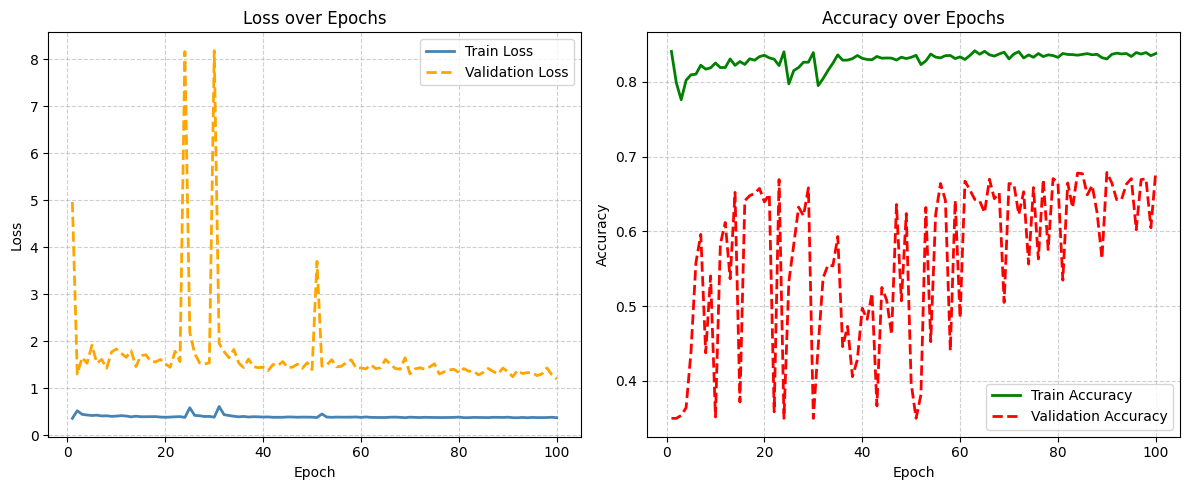

Final validation Accuracy: 0.663512110710144
Training with hidden_dim=16, batch_size=64, lr=0.005, dropout_rate=0.0


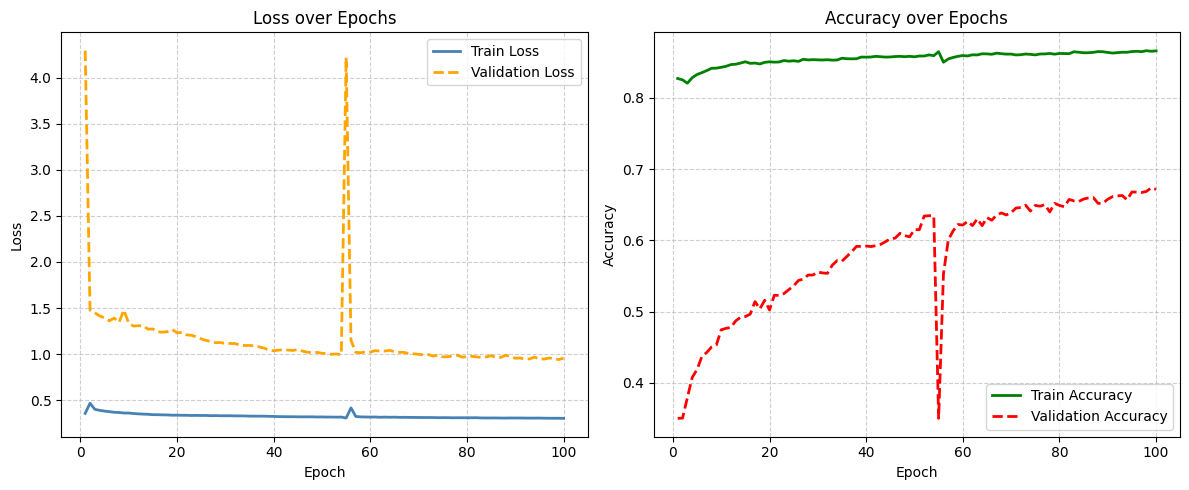

Final validation Accuracy: 0.6535226106643677
Training with hidden_dim=16, batch_size=64, lr=0.005, dropout_rate=0.2


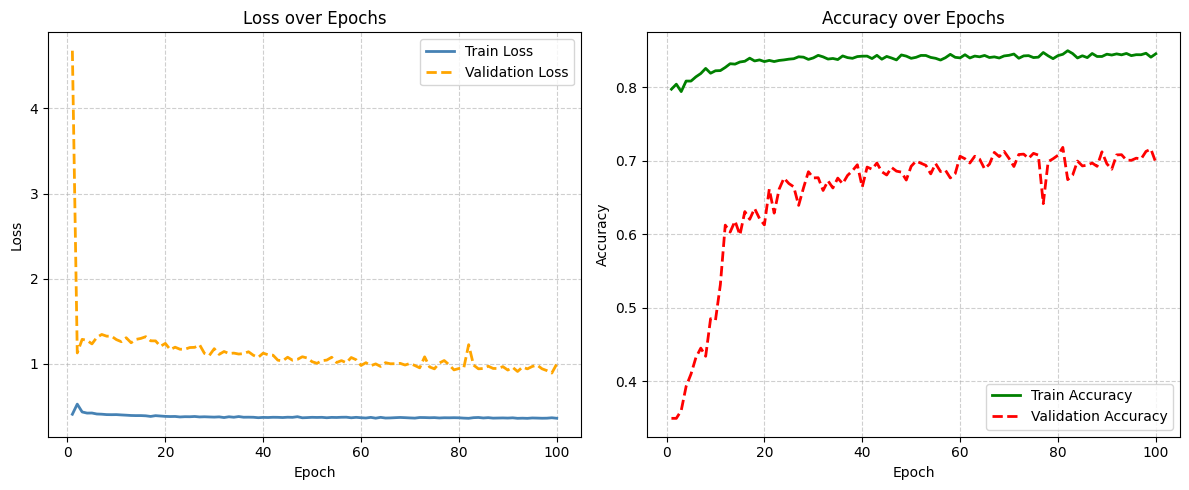

Final validation Accuracy: 0.6756046414375305
Training with hidden_dim=16, batch_size=64, lr=0.001, dropout_rate=0.0


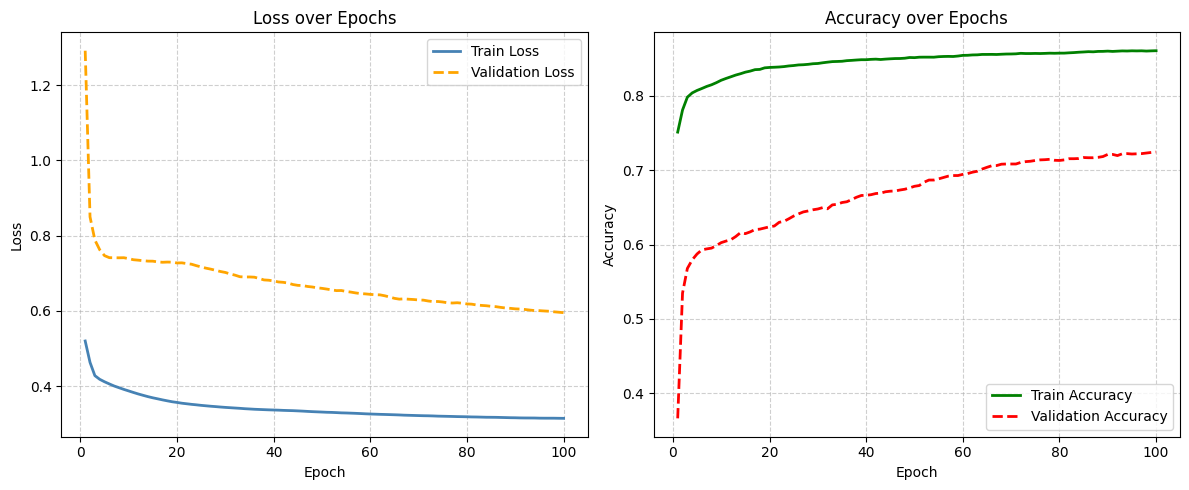

Final validation Accuracy: 0.7082018852233887
Training with hidden_dim=16, batch_size=64, lr=0.001, dropout_rate=0.2


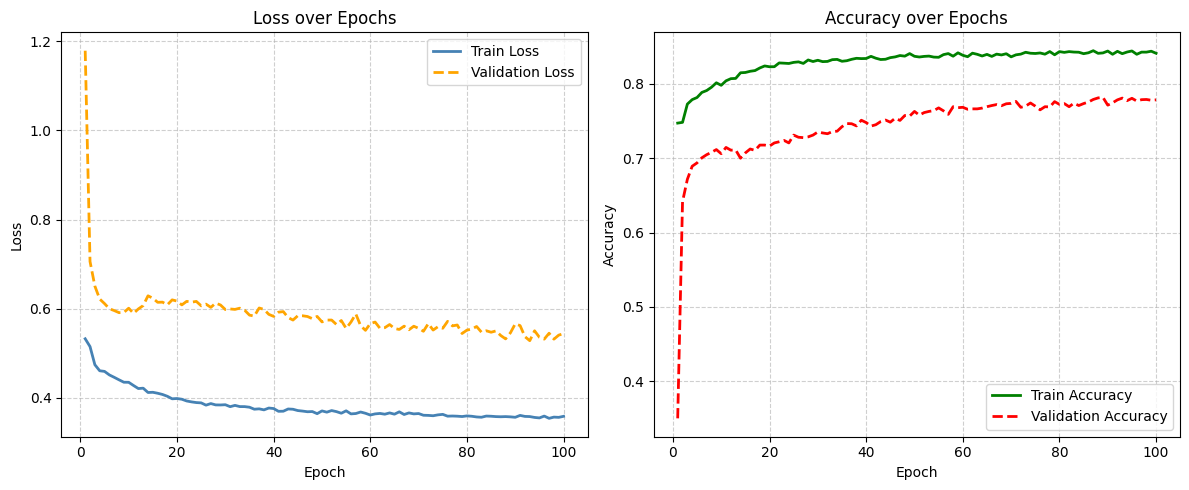

Final validation Accuracy: 0.761040985584259
Training with hidden_dim=16, batch_size=128, lr=0.01, dropout_rate=0.0


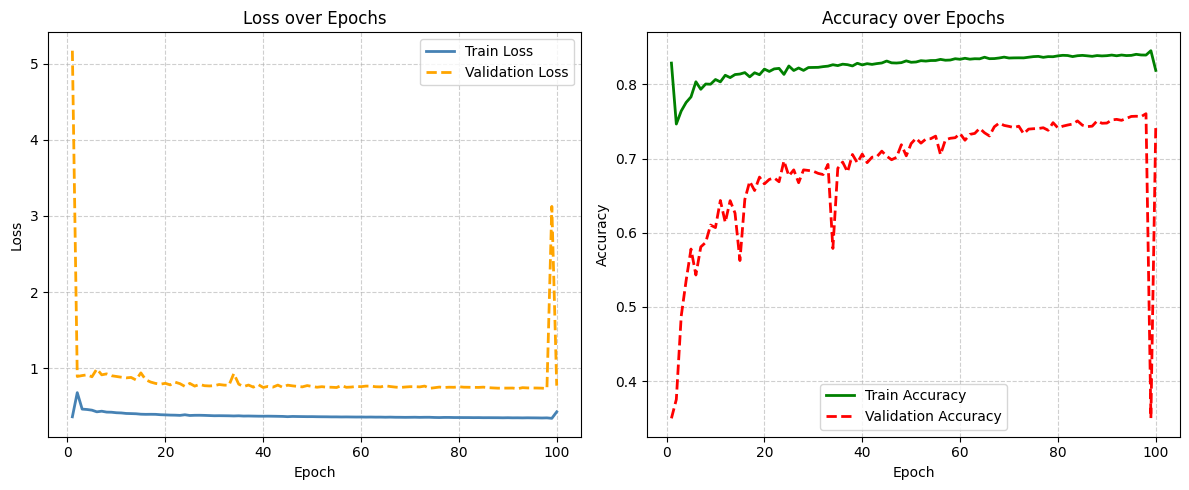

Final validation Accuracy: 0.730021059513092
Training with hidden_dim=16, batch_size=128, lr=0.01, dropout_rate=0.2


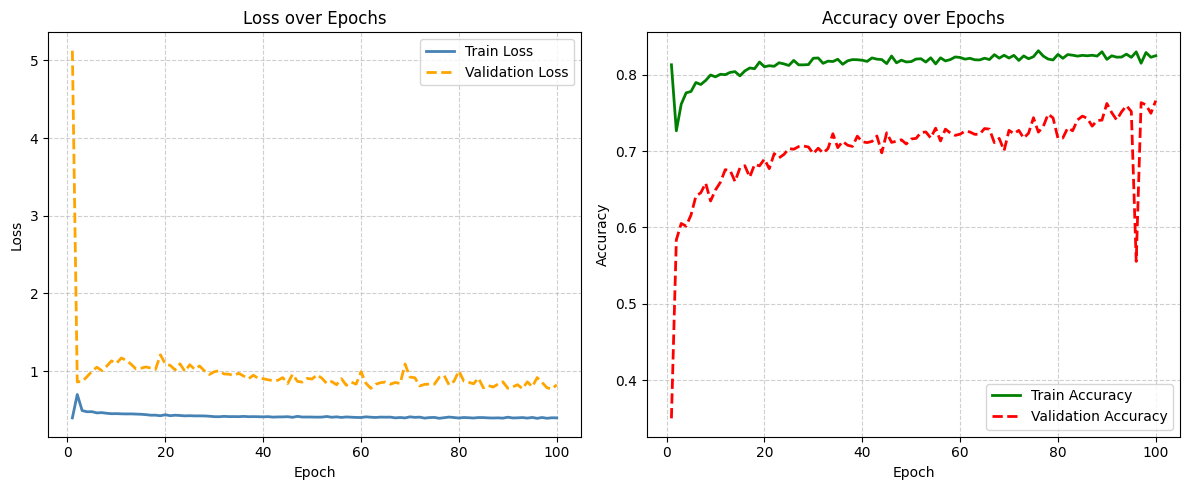

Final validation Accuracy: 0.7518401741981506
Training with hidden_dim=16, batch_size=128, lr=0.005, dropout_rate=0.0


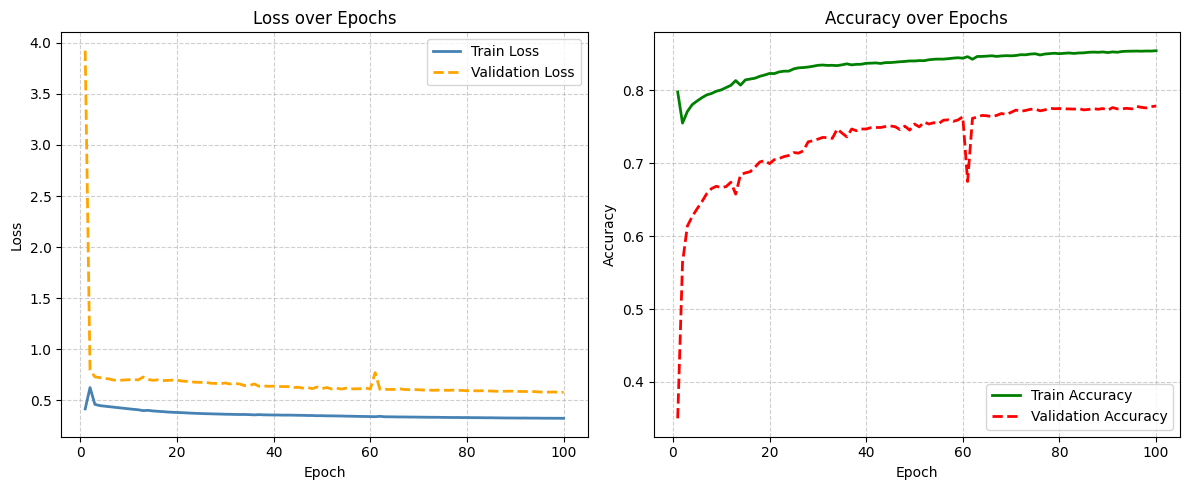

Final validation Accuracy: 0.7631440758705139
Training with hidden_dim=16, batch_size=128, lr=0.005, dropout_rate=0.2


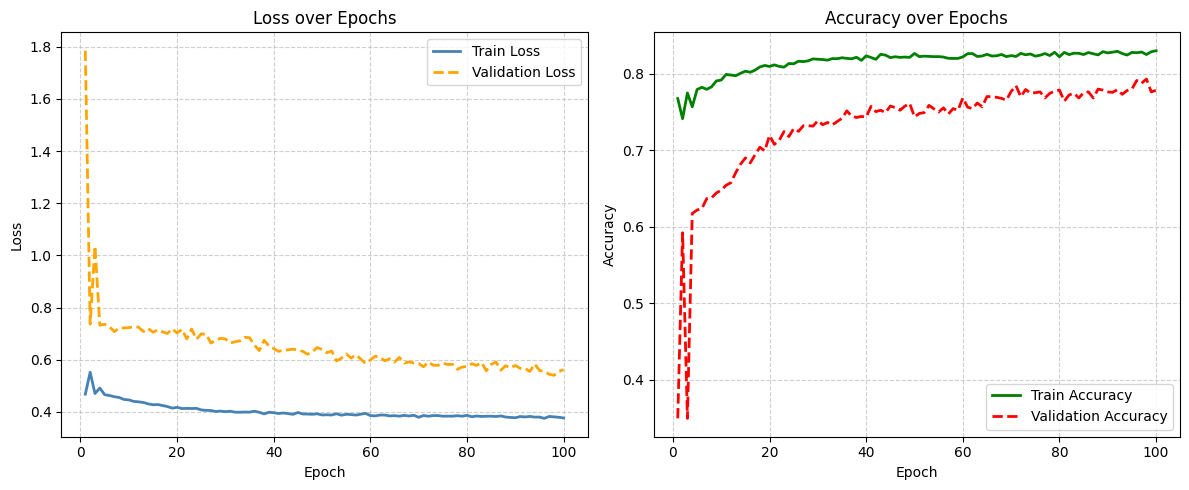

Final validation Accuracy: 0.7613039016723633
Training with hidden_dim=16, batch_size=128, lr=0.001, dropout_rate=0.0


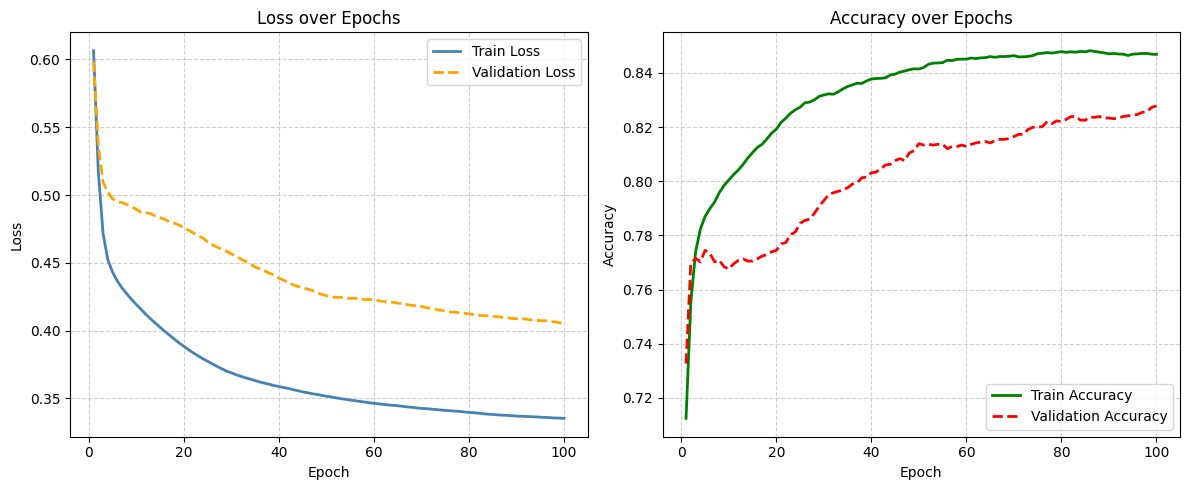

Final validation Accuracy: 0.8057308197021484
Training with hidden_dim=16, batch_size=128, lr=0.001, dropout_rate=0.2


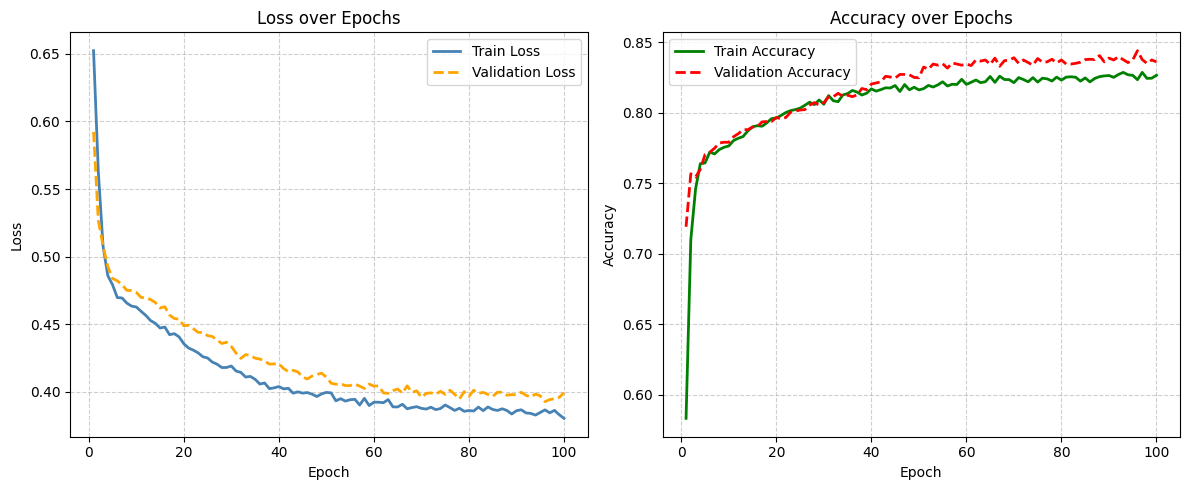

Final validation Accuracy: 0.8257097601890564
Training with hidden_dim=32, batch_size=32, lr=0.01, dropout_rate=0.0


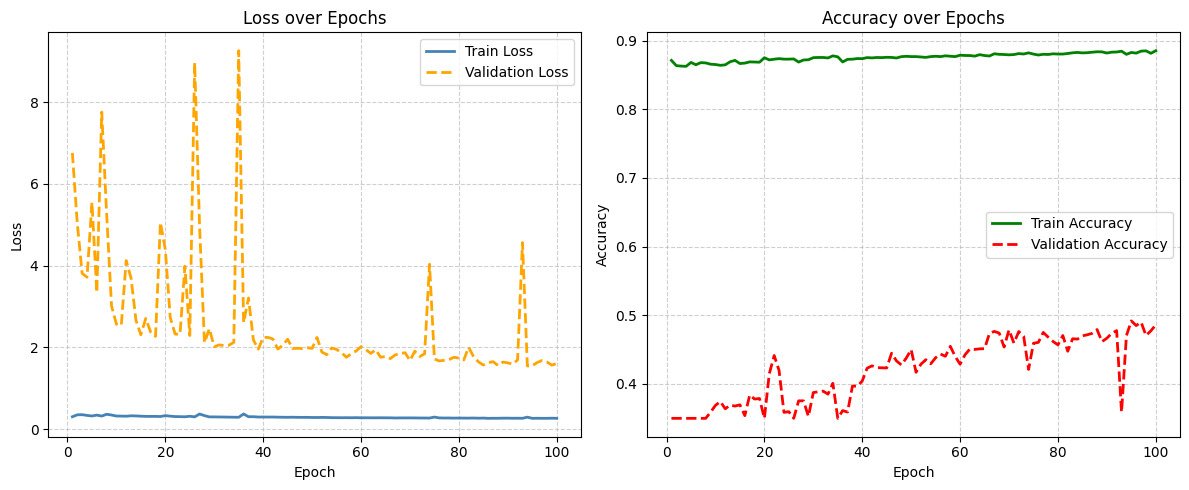

Final validation Accuracy: 0.47870662808418274
Training with hidden_dim=32, batch_size=32, lr=0.01, dropout_rate=0.2


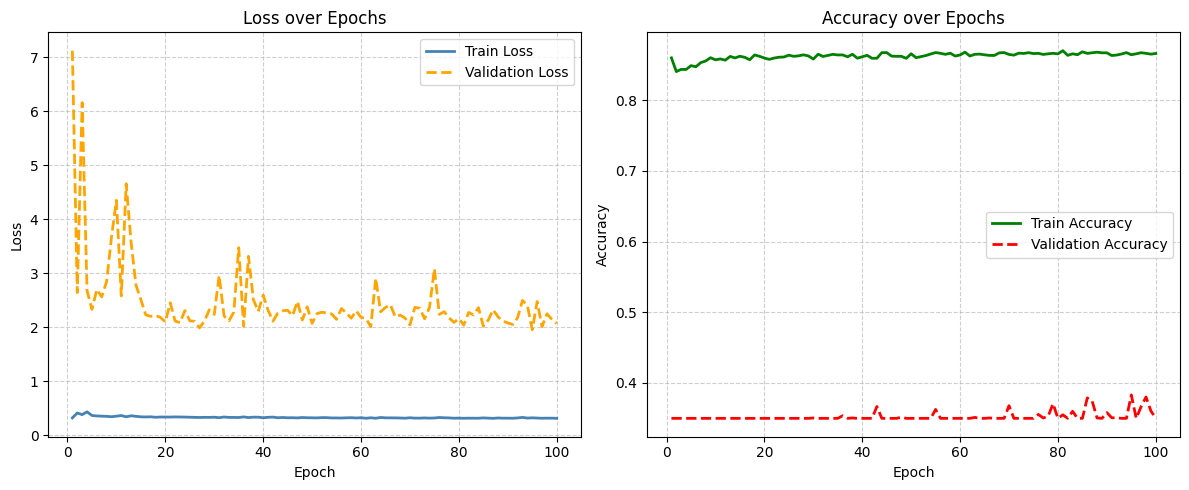

Final validation Accuracy: 0.35620400309562683
Training with hidden_dim=32, batch_size=32, lr=0.005, dropout_rate=0.0


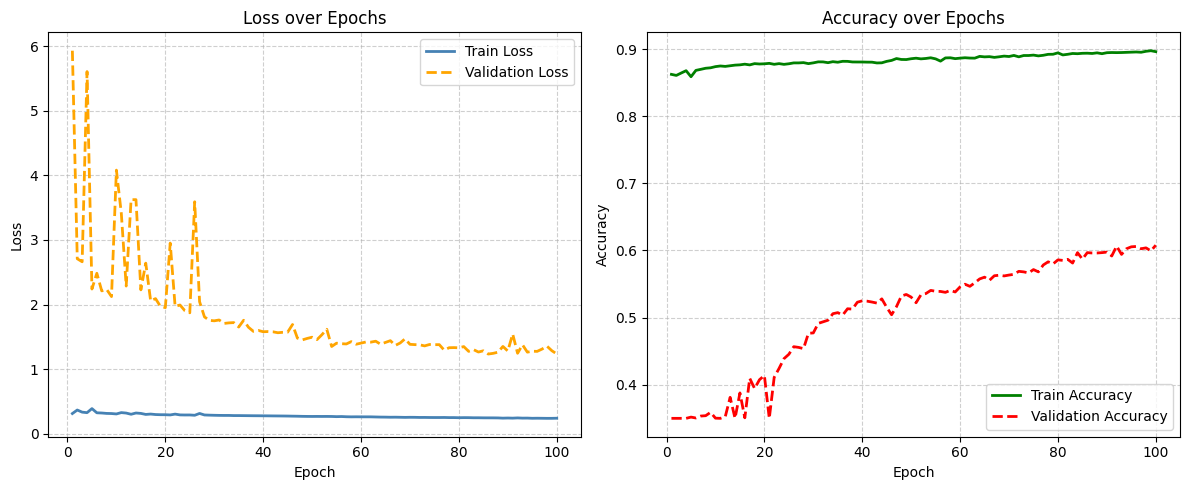

Final validation Accuracy: 0.6019979119300842
Training with hidden_dim=32, batch_size=32, lr=0.005, dropout_rate=0.2


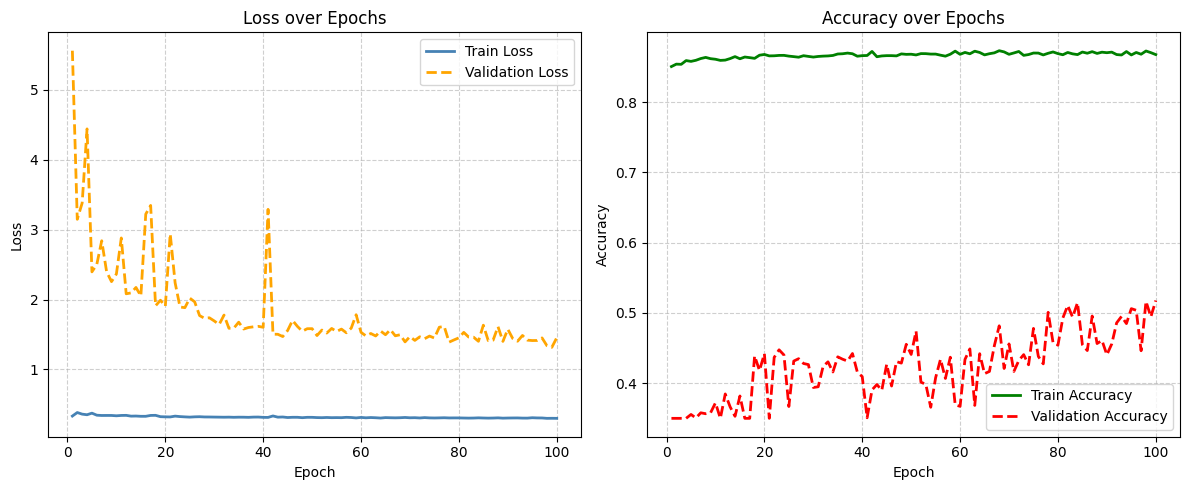

Final validation Accuracy: 0.5084121823310852
Training with hidden_dim=32, batch_size=32, lr=0.001, dropout_rate=0.0


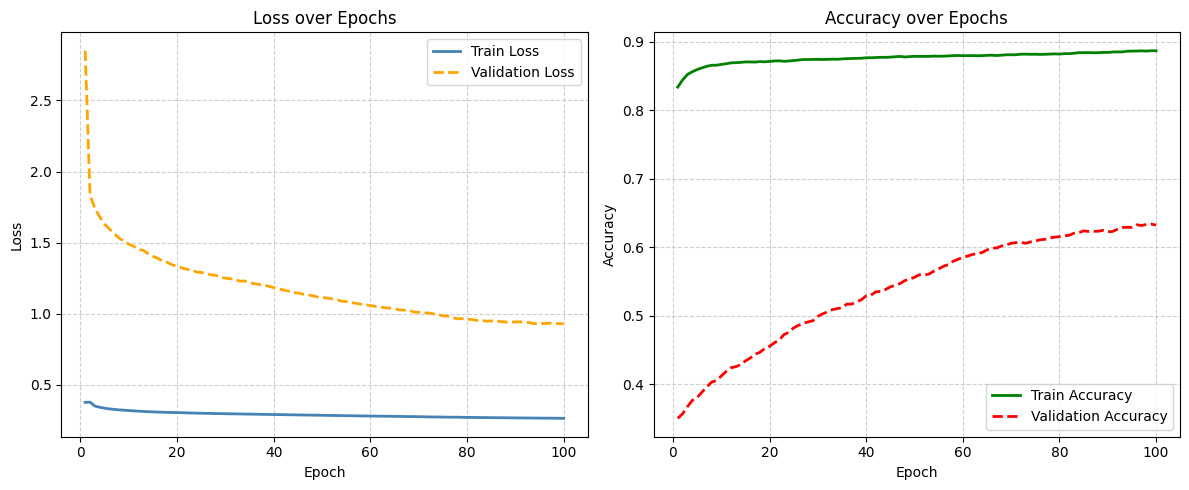

Final validation Accuracy: 0.6143532991409302
Training with hidden_dim=32, batch_size=32, lr=0.001, dropout_rate=0.2


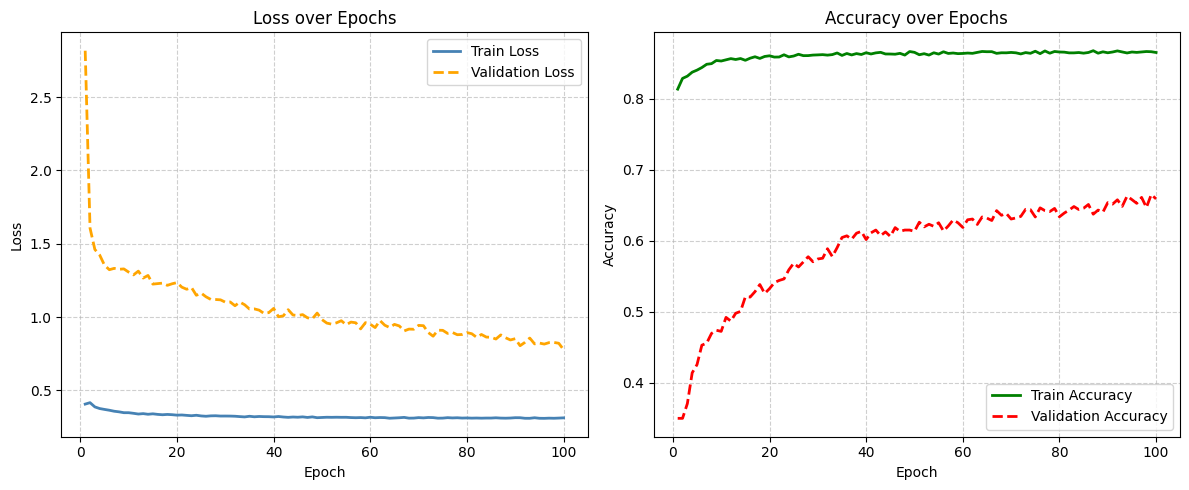

Final validation Accuracy: 0.6403785347938538
Training with hidden_dim=32, batch_size=64, lr=0.01, dropout_rate=0.0


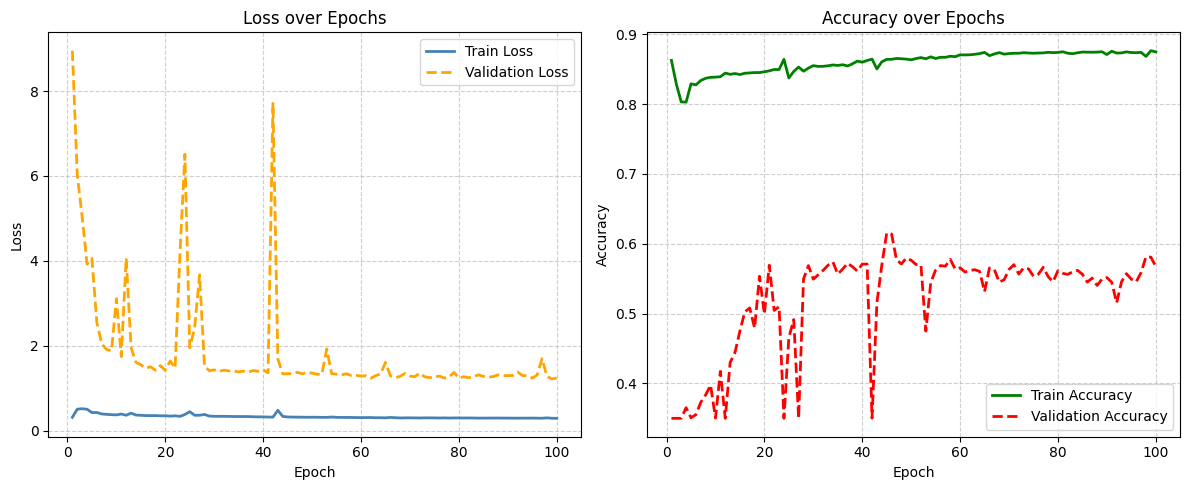

Final validation Accuracy: 0.5604626536369324
Training with hidden_dim=32, batch_size=64, lr=0.01, dropout_rate=0.2


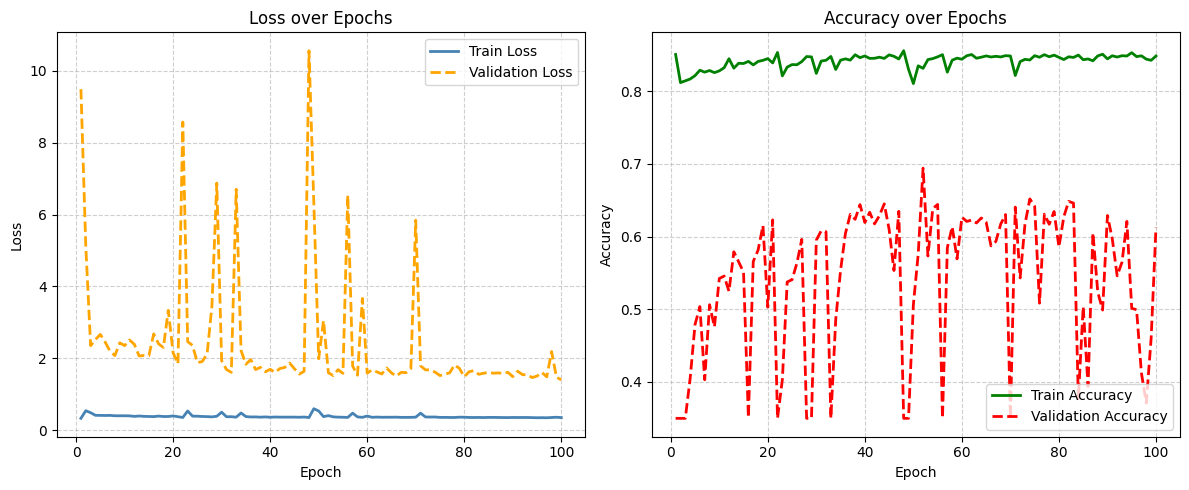

Final validation Accuracy: 0.598317563533783
Training with hidden_dim=32, batch_size=64, lr=0.005, dropout_rate=0.0


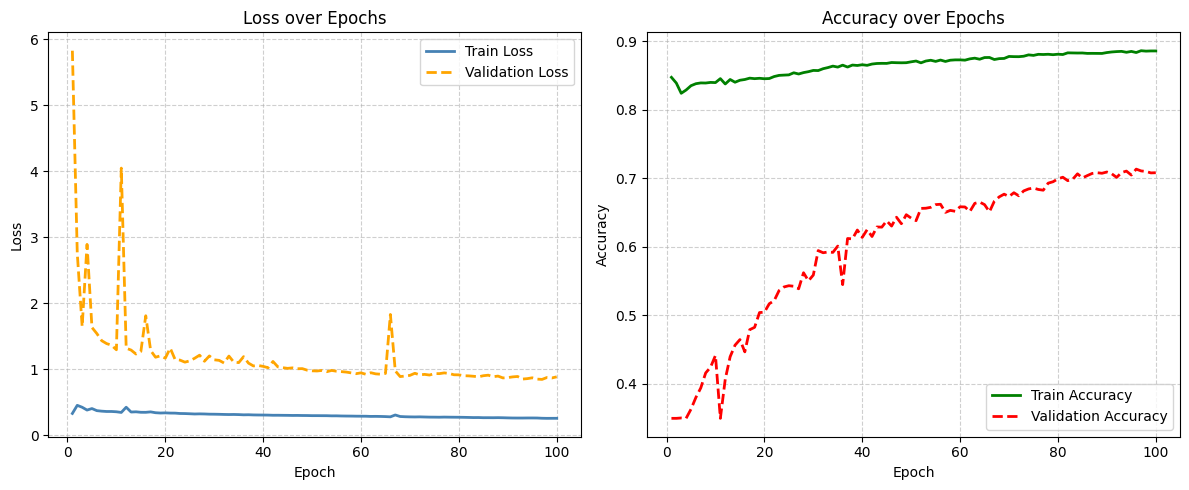

Final validation Accuracy: 0.6887486577033997
Training with hidden_dim=32, batch_size=64, lr=0.005, dropout_rate=0.2


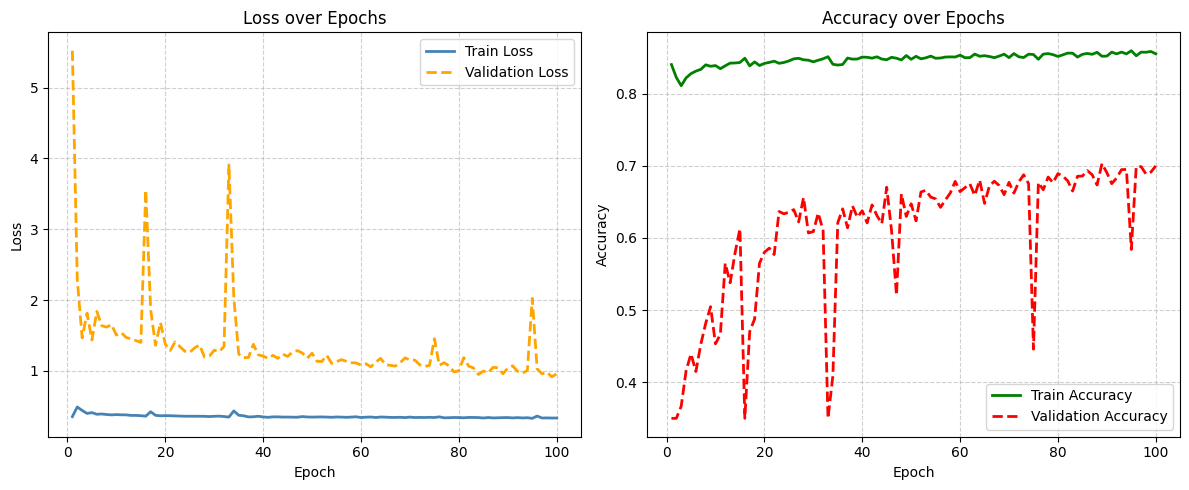

Final validation Accuracy: 0.6869085431098938
Training with hidden_dim=32, batch_size=64, lr=0.001, dropout_rate=0.0


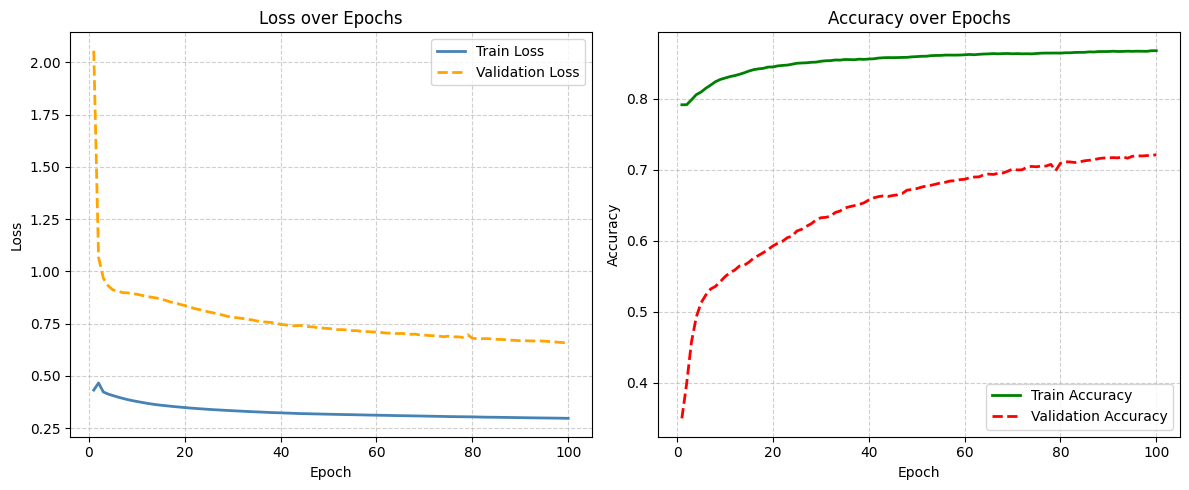

Final validation Accuracy: 0.7103049159049988
Training with hidden_dim=32, batch_size=64, lr=0.001, dropout_rate=0.2


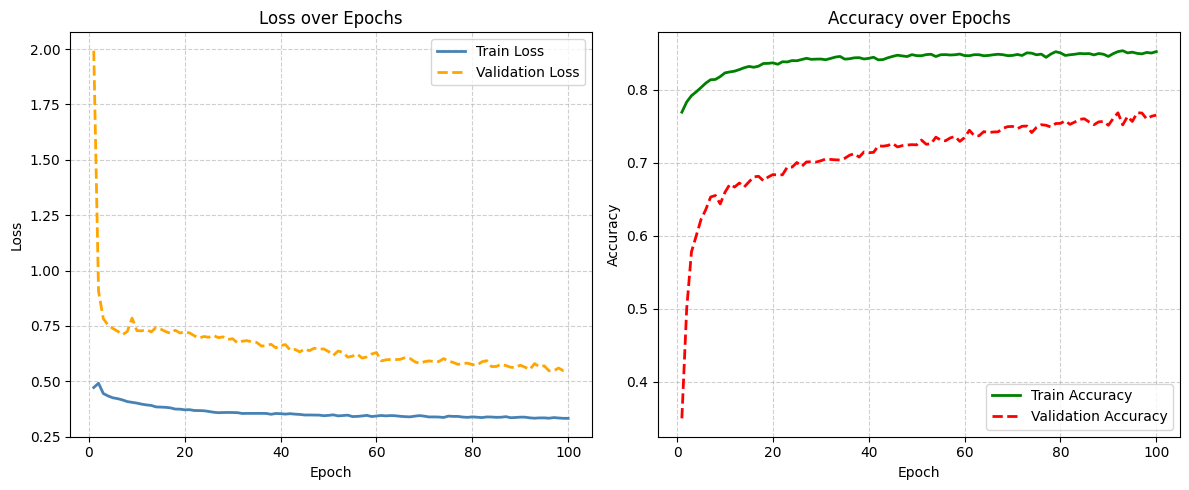

Final validation Accuracy: 0.7489484548568726
Training with hidden_dim=32, batch_size=128, lr=0.01, dropout_rate=0.0


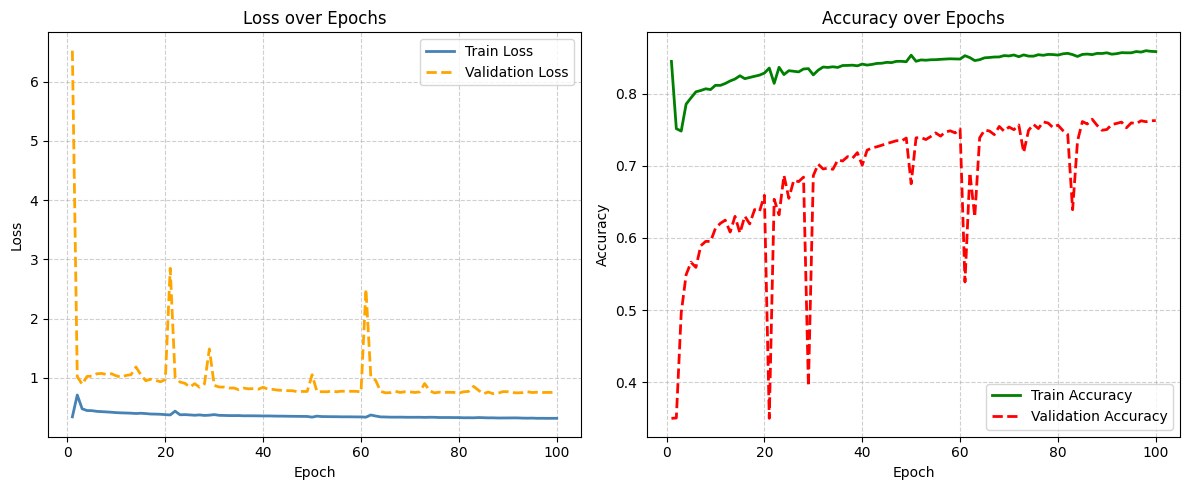

Final validation Accuracy: 0.738959014415741
Training with hidden_dim=32, batch_size=128, lr=0.01, dropout_rate=0.2


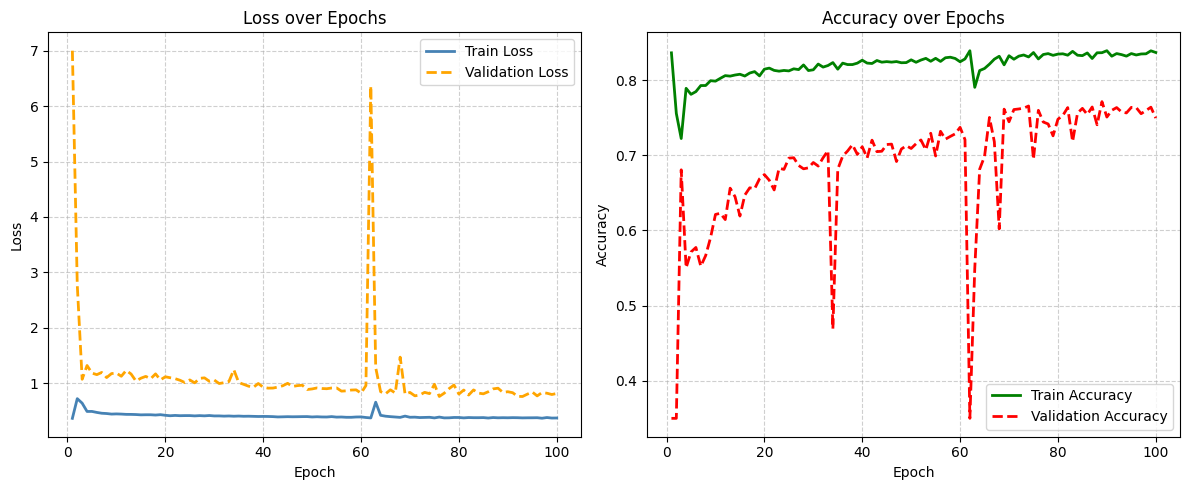

Final validation Accuracy: 0.7326498627662659
Training with hidden_dim=32, batch_size=128, lr=0.005, dropout_rate=0.0


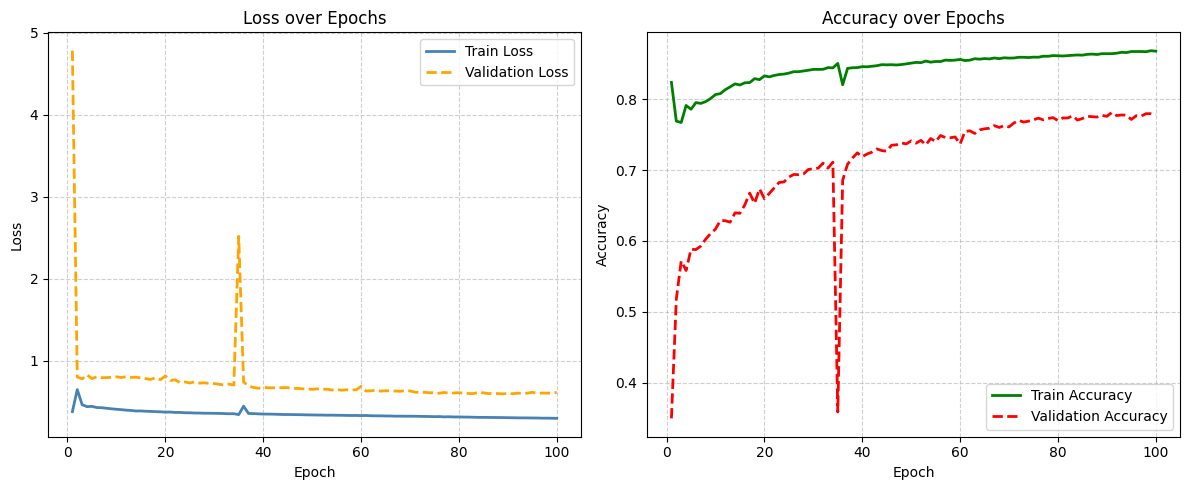

Final validation Accuracy: 0.7523659467697144
Training with hidden_dim=32, batch_size=128, lr=0.005, dropout_rate=0.2


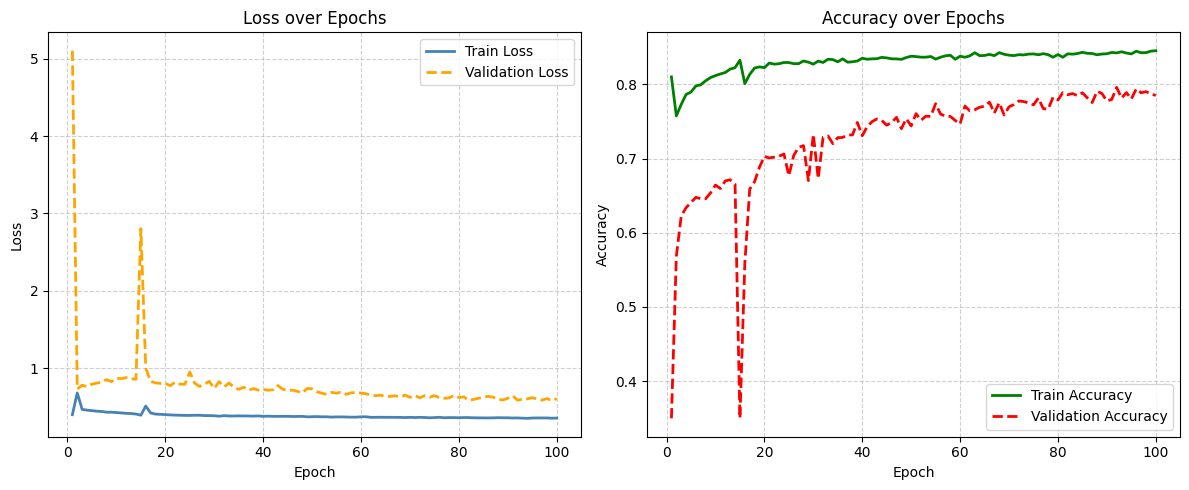

Final validation Accuracy: 0.7584121823310852
Training with hidden_dim=32, batch_size=128, lr=0.001, dropout_rate=0.0


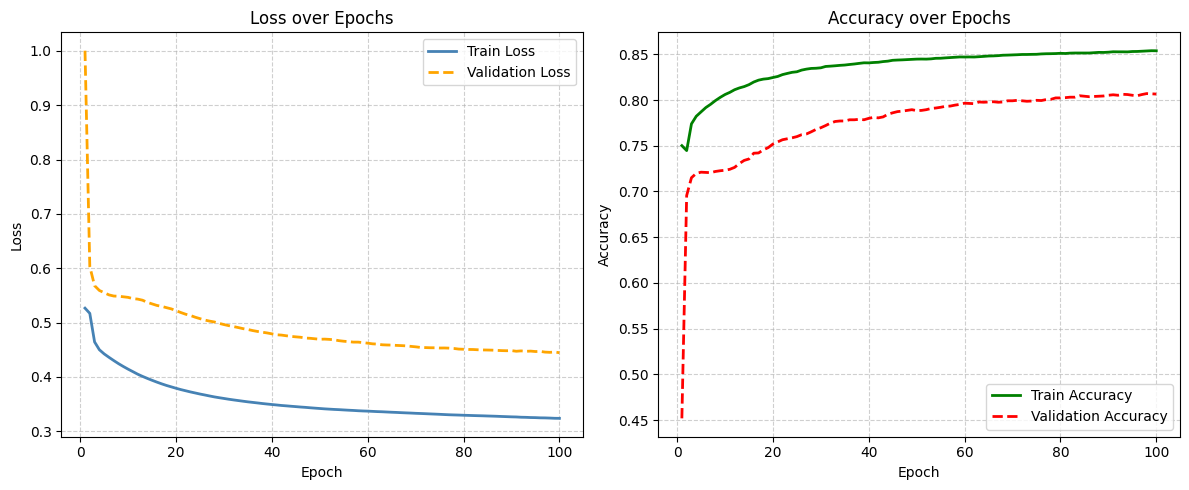

Final validation Accuracy: 0.7912723422050476
Training with hidden_dim=32, batch_size=128, lr=0.001, dropout_rate=0.2


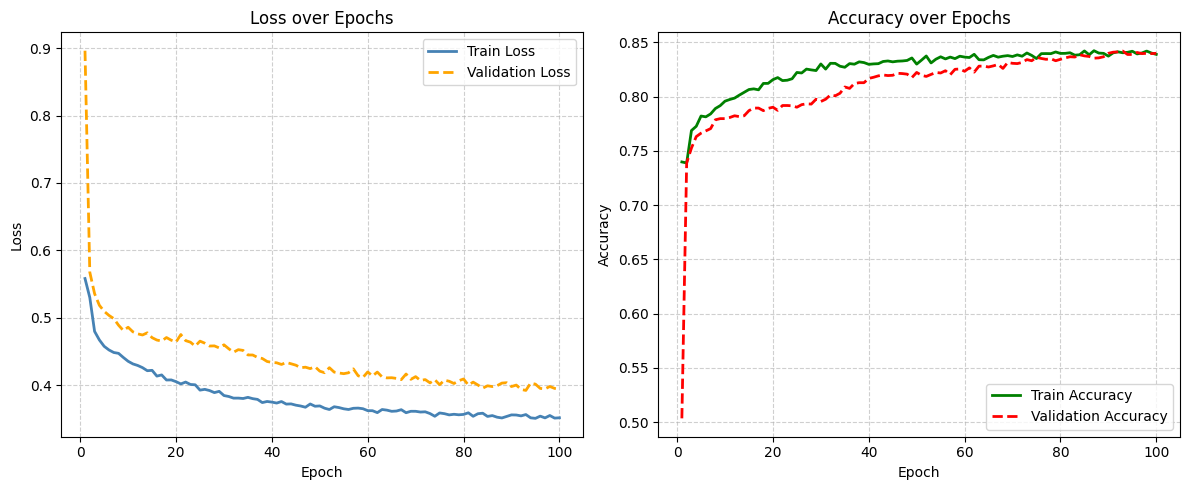

Final validation Accuracy: 0.8159831762313843
Training with hidden_dim=64, batch_size=32, lr=0.01, dropout_rate=0.0


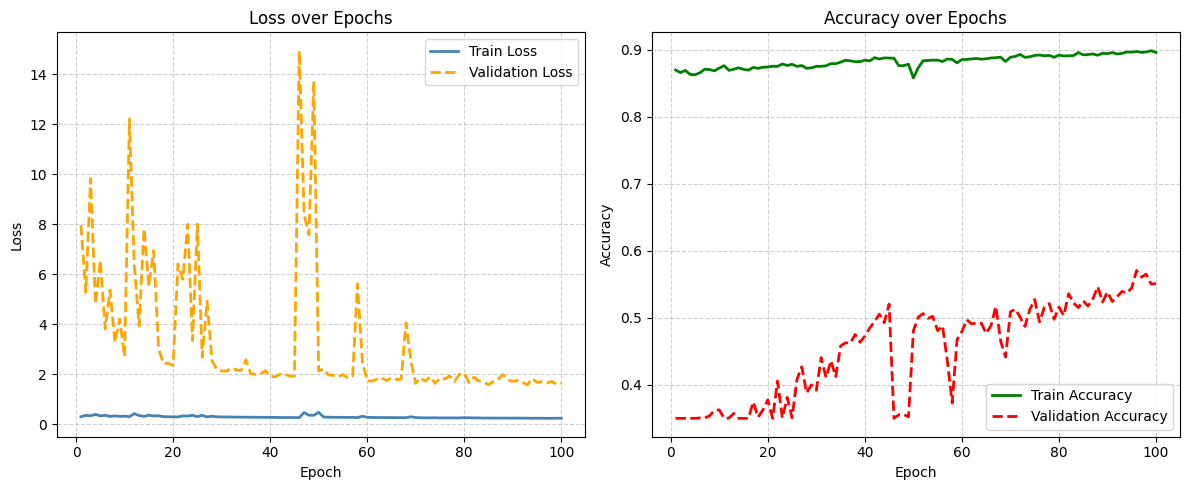

Final validation Accuracy: 0.5360147356987
Training with hidden_dim=64, batch_size=32, lr=0.01, dropout_rate=0.2


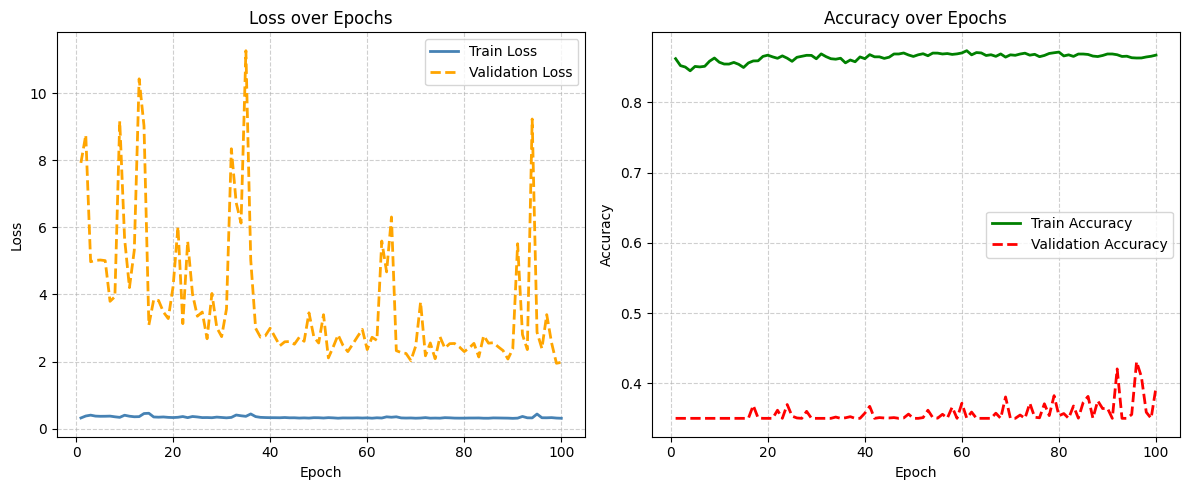

Final validation Accuracy: 0.3972134590148926
Training with hidden_dim=64, batch_size=32, lr=0.005, dropout_rate=0.0


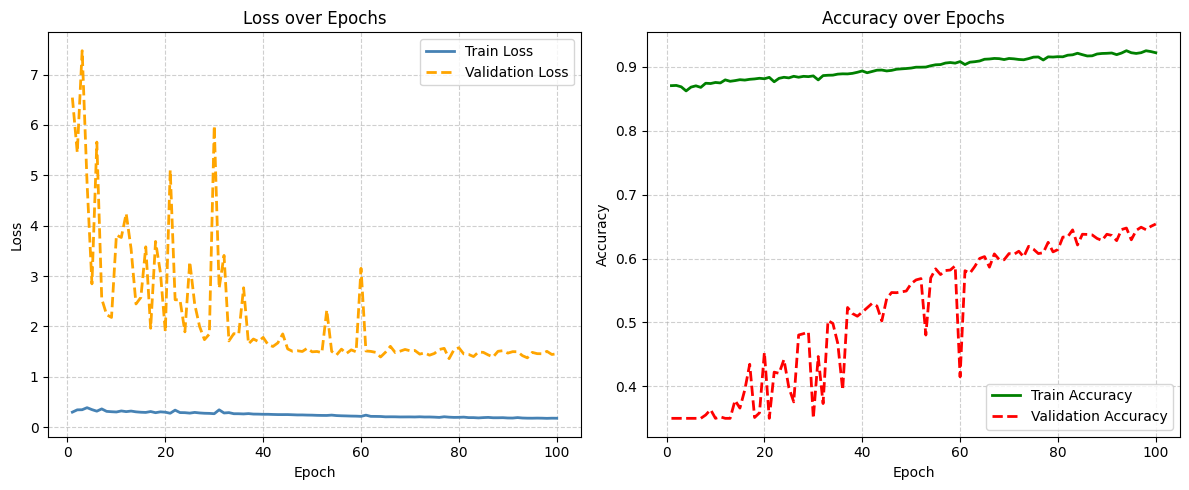

Final validation Accuracy: 0.6401156783103943
Training with hidden_dim=64, batch_size=32, lr=0.005, dropout_rate=0.2


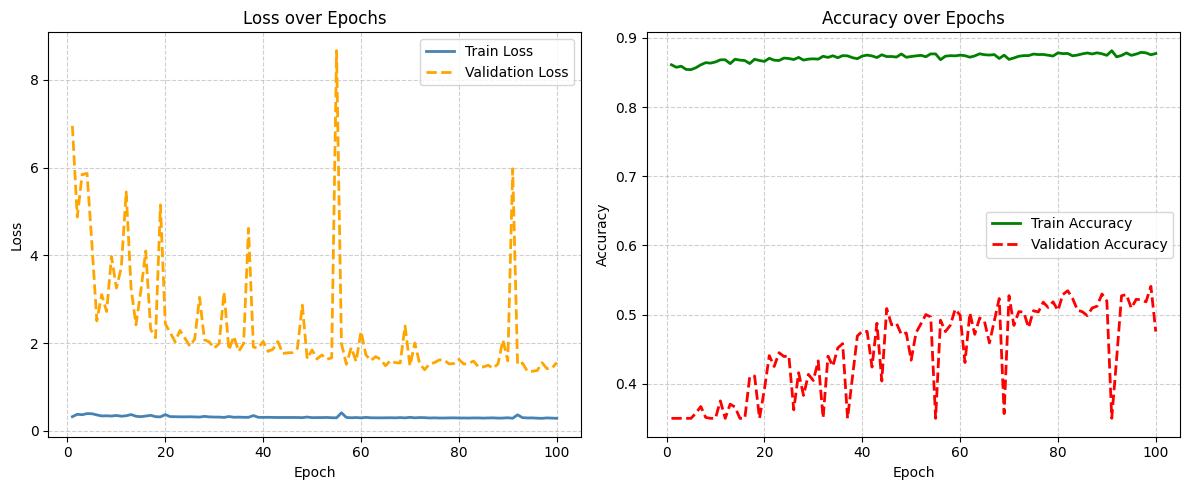

Final validation Accuracy: 0.47318610548973083
Training with hidden_dim=64, batch_size=32, lr=0.001, dropout_rate=0.0


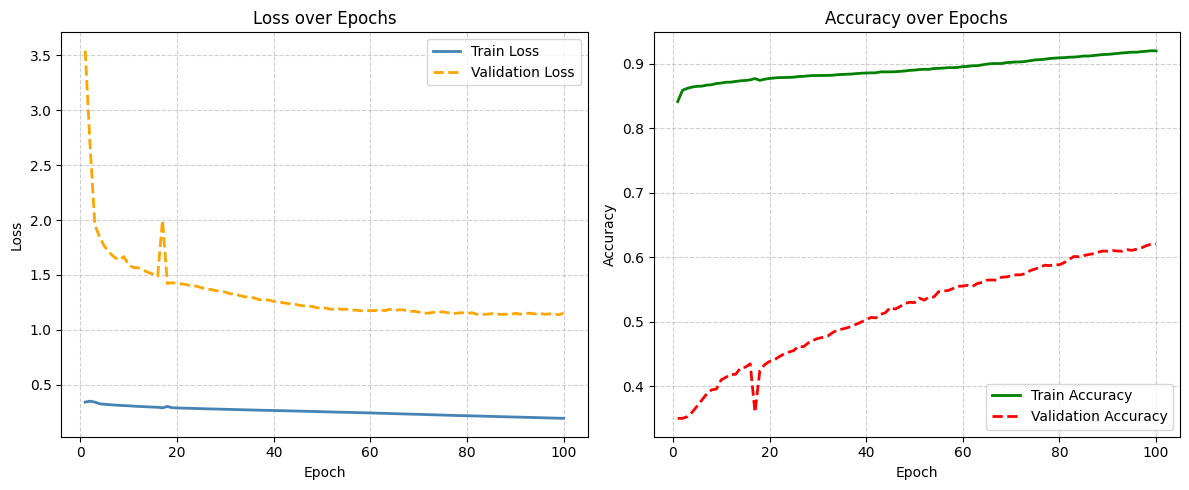

Final validation Accuracy: 0.6138275265693665
Training with hidden_dim=64, batch_size=32, lr=0.001, dropout_rate=0.2


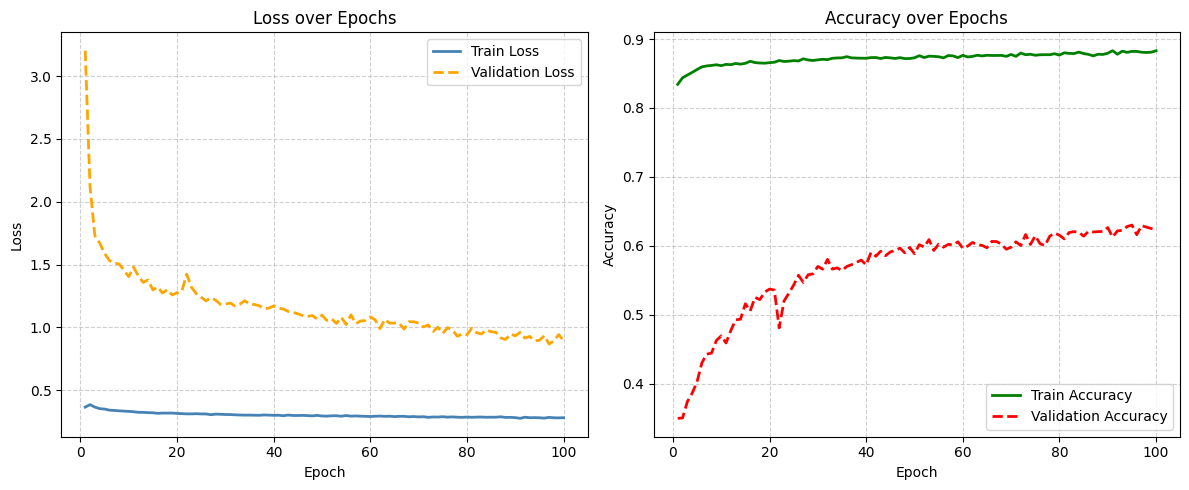

Final validation Accuracy: 0.6069926619529724
Training with hidden_dim=64, batch_size=64, lr=0.01, dropout_rate=0.0


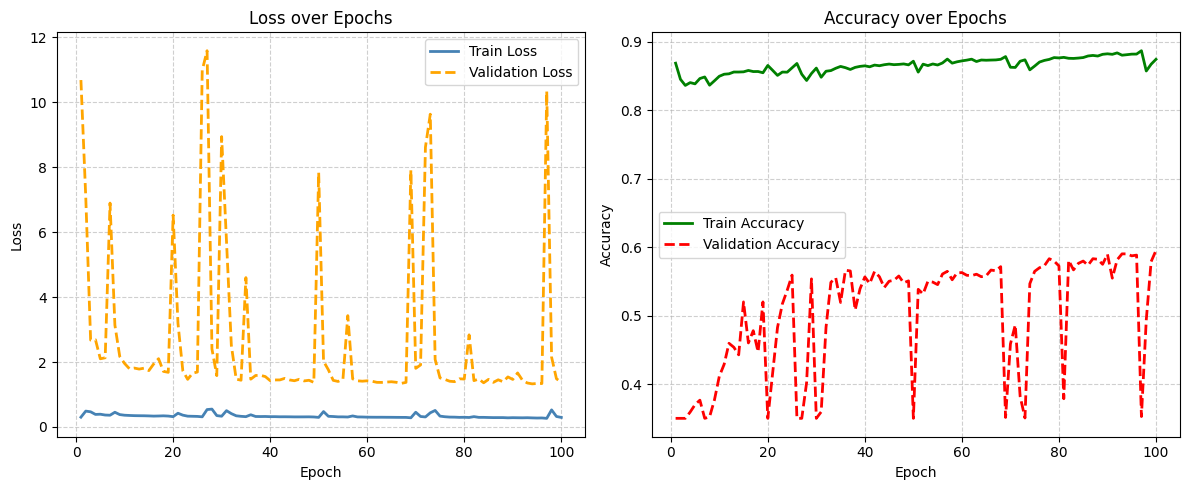

Final validation Accuracy: 0.5833333134651184
Training with hidden_dim=64, batch_size=64, lr=0.01, dropout_rate=0.2


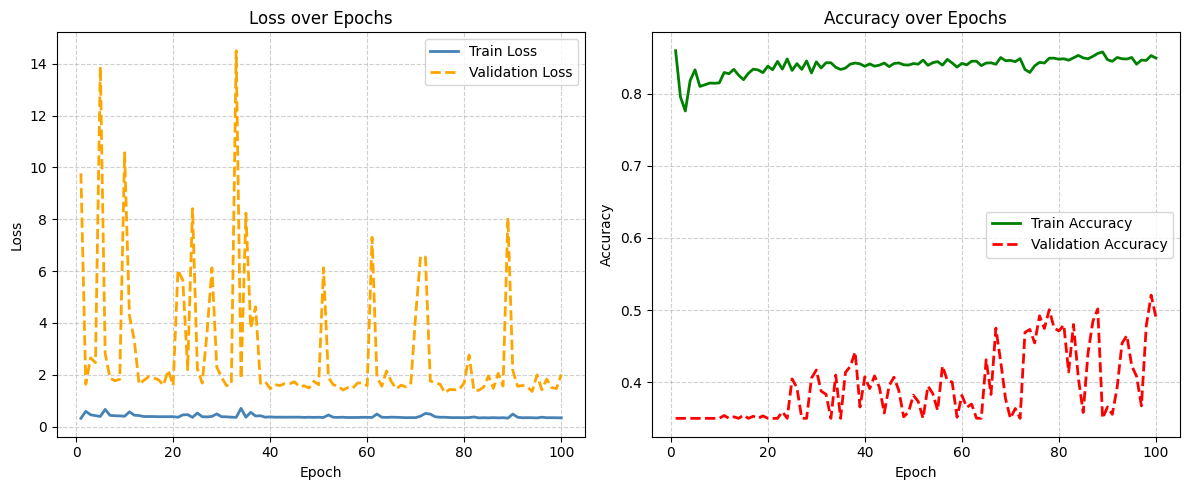

Final validation Accuracy: 0.4879074692726135
Training with hidden_dim=64, batch_size=64, lr=0.005, dropout_rate=0.0


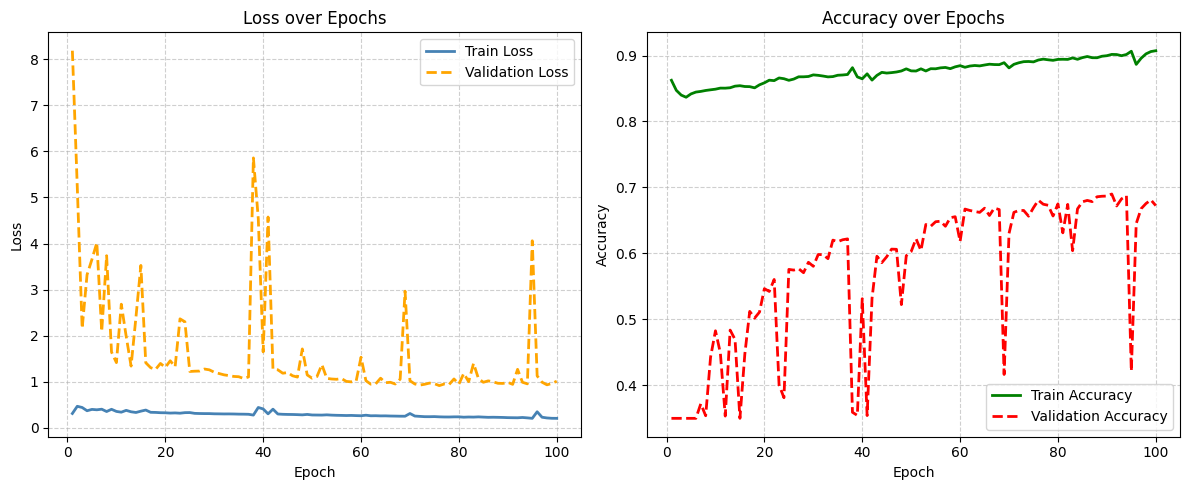

Final validation Accuracy: 0.6574658155441284
Training with hidden_dim=64, batch_size=64, lr=0.005, dropout_rate=0.2


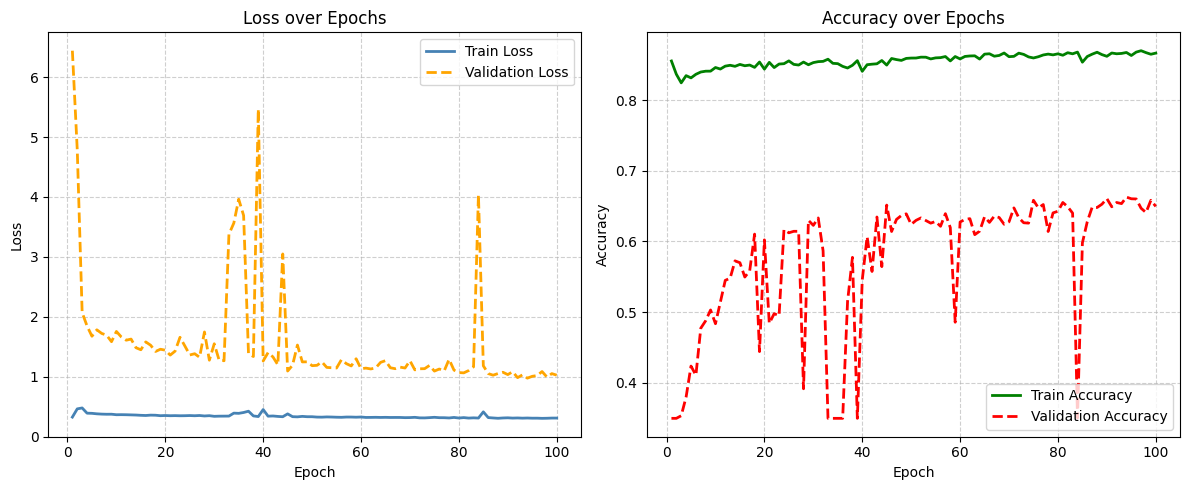

Final validation Accuracy: 0.6256572008132935
Training with hidden_dim=64, batch_size=64, lr=0.001, dropout_rate=0.0


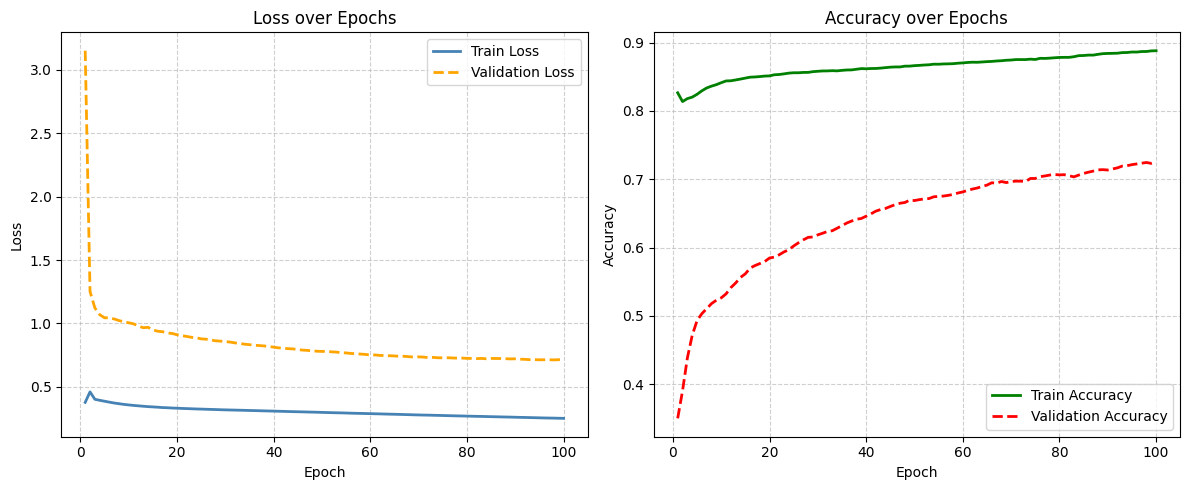

Final validation Accuracy: 0.7016298770904541
Training with hidden_dim=64, batch_size=64, lr=0.001, dropout_rate=0.2


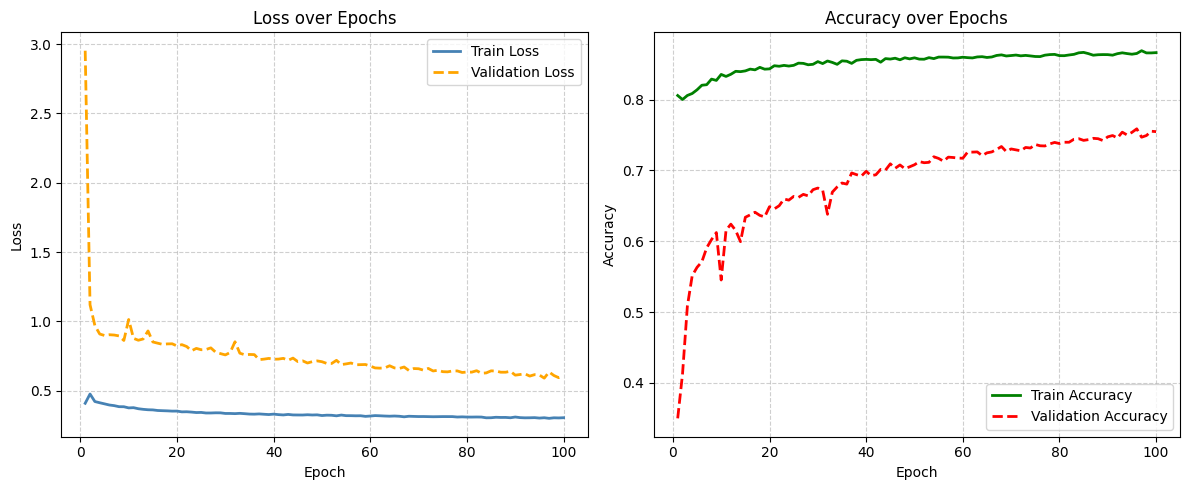

Final validation Accuracy: 0.7323869466781616
Training with hidden_dim=64, batch_size=128, lr=0.01, dropout_rate=0.0


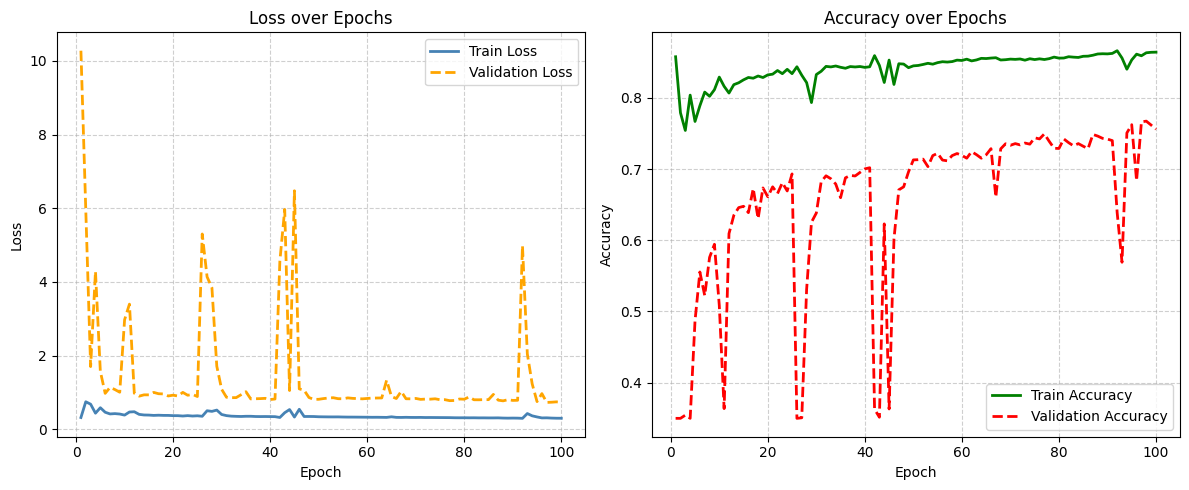

Final validation Accuracy: 0.7400104999542236
Training with hidden_dim=64, batch_size=128, lr=0.01, dropout_rate=0.2


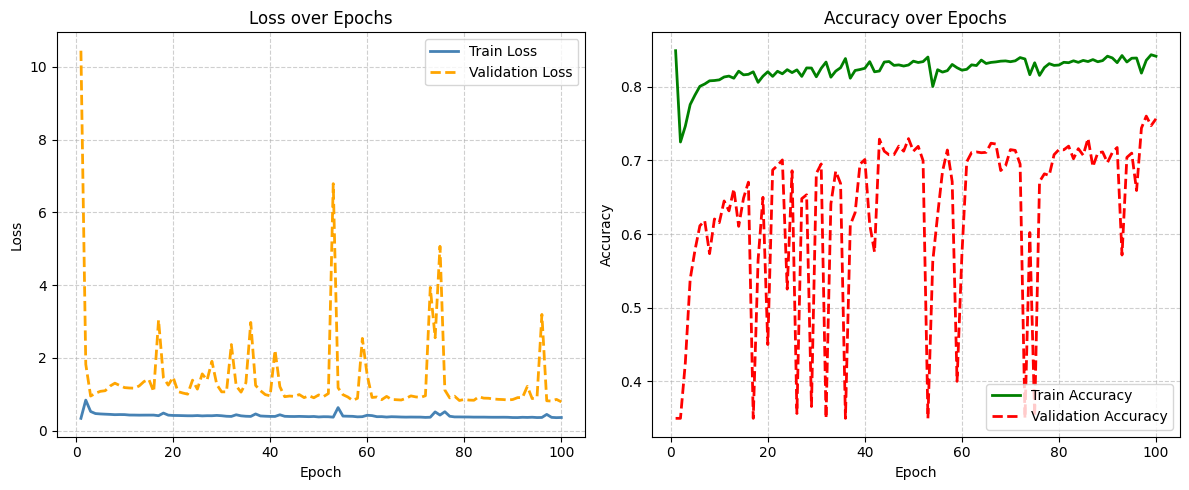

Final validation Accuracy: 0.7297581434249878
Training with hidden_dim=64, batch_size=128, lr=0.005, dropout_rate=0.0


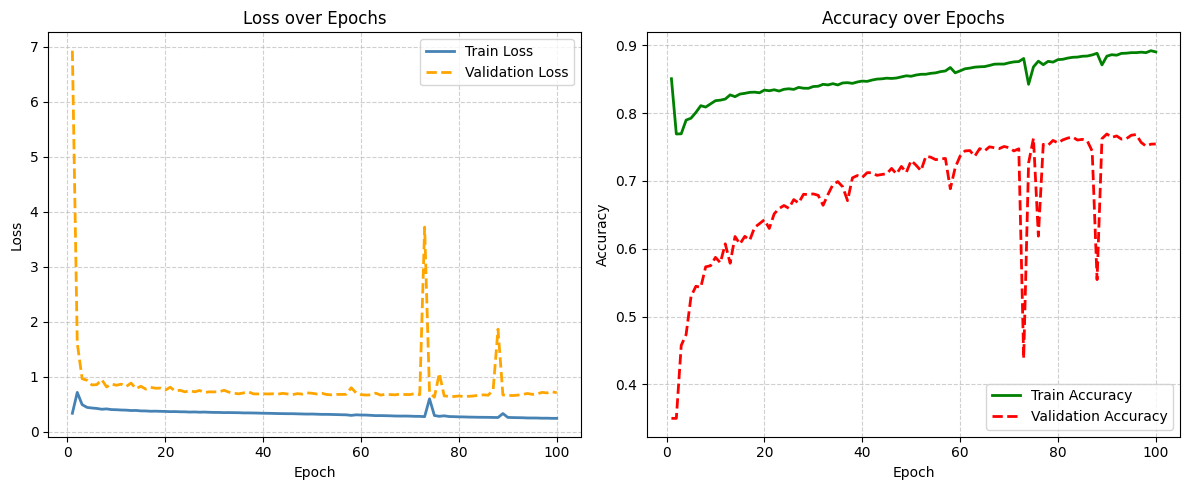

Final validation Accuracy: 0.7436908483505249
Training with hidden_dim=64, batch_size=128, lr=0.005, dropout_rate=0.2


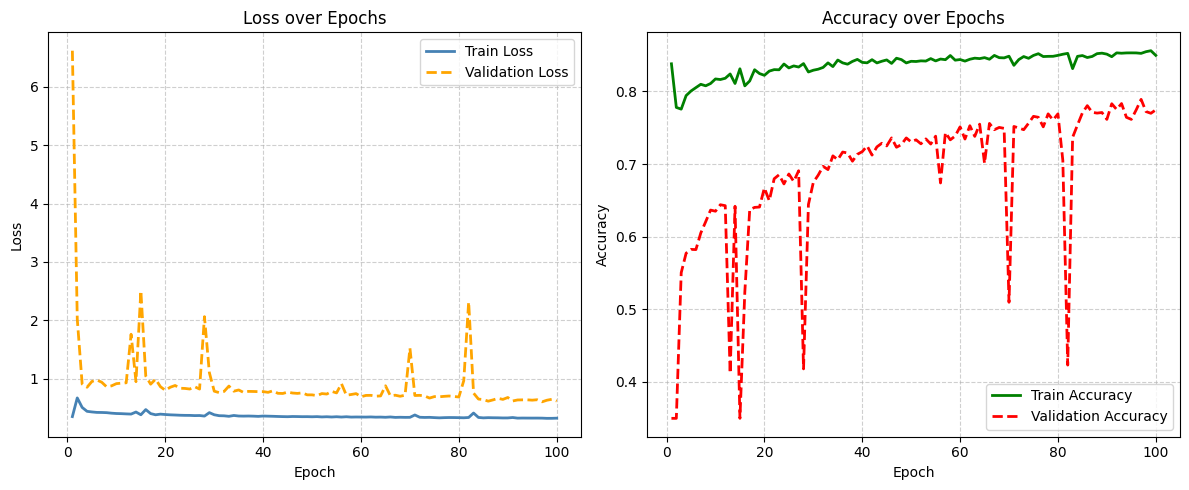

Final validation Accuracy: 0.754206120967865
Training with hidden_dim=64, batch_size=128, lr=0.001, dropout_rate=0.0


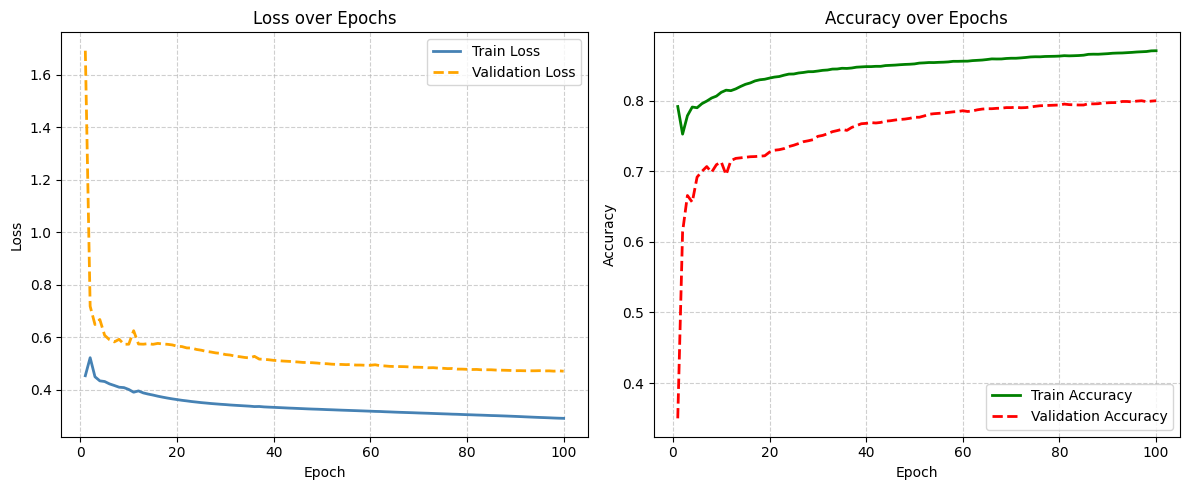

Final validation Accuracy: 0.784700334072113
Training with hidden_dim=64, batch_size=128, lr=0.001, dropout_rate=0.2


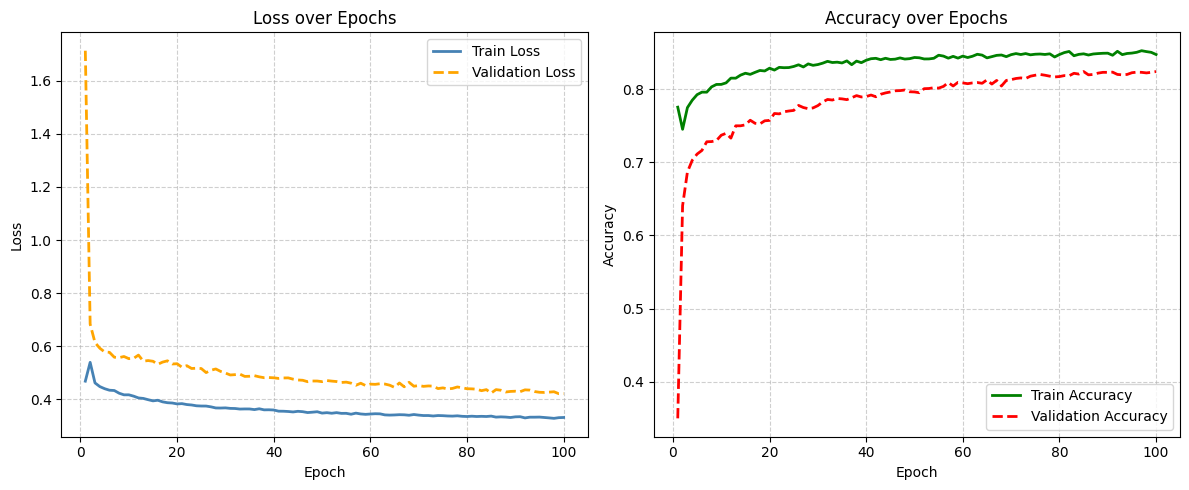

Final validation Accuracy: 0.8009989261627197


In [23]:
best_model = None
best_valid_acc = 0.0

for hidden_dim in [16, 32, 64]:
    for batch_size in [32, 64, 128]:
        for lr in [0.01, 0.005, 0.001]:
            for dropout_rate in [0., 0.2]:
                print(f"Training with hidden_dim={hidden_dim}, batch_size={batch_size}, lr={lr}, dropout_rate={dropout_rate}")
                nn_model = SimpleNN(input_dim=10, hidden_dim=hidden_dim, dropout_rate=dropout_rate)
                criterion = nn.BCELoss()    
                optimizer = torch.optim.Adam(nn_model.parameters(), lr=lr)

                # Train the model
                train_loss_list, test_loss_list, train_acc_list, test_acc_list = model_train_split(
                     X_train_tensor, y_train_tensor,
                     X_test_tensor, y_test_tensor,
                     nn_model, criterion, optimizer,
                     n_epochs=100, batch_size=batch_size, val_frac=0.2, verbose=False
                )

                # Plot metrics
                plot_metrics(train_loss_list, test_loss_list, train_acc_list, test_acc_list)

                # Final validation accuracy
                nn_model.eval()
                with torch.no_grad():
                    y_valid_pred = nn_model(X_valid_tensor)
                    y_valid_pred = (y_valid_pred > 0.5).float()
                    valid_acc = (y_valid_pred == y_valid_tensor).float().mean().item()
                    print("Final validation Accuracy:", valid_acc)

                    # Save best model
                    if valid_acc > best_valid_acc:
                        best_valid_acc = valid_acc
                        best_model = nn_model.state_dict()  # Save model weights

In [29]:
# Recreate the same model architecture FOR THE BEST HYPERPARAMETERS
best_nn_model = SimpleNN(input_dim=10, hidden_dim=16, dropout_rate=0.2)

# Load the best saved weights
best_nn_model.load_state_dict(best_model)
best_nn_model.eval()

# Evaluate on the test set
with torch.no_grad():
    y_test_pred = best_nn_model(X_test_tensor)
    y_test_pred_label = (y_test_pred > 0.5).float()  # Convert probabilities to 0/1

    test_acc = (y_test_pred_label == y_test_tensor).float().mean().item()
    print("Test Accuracy:", test_acc)

Test Accuracy: 0.8362250328063965


In [30]:
print(sklearn.metrics.classification_report(y_test_tensor, y_test_pred_label))

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79      1331
         1.0       0.91      0.83      0.87      2473

    accuracy                           0.84      3804
   macro avg       0.82      0.84      0.83      3804
weighted avg       0.85      0.84      0.84      3804



### Very Important notes about nn
Some notes about NN model. Our data was imbalanced dataset and we first split it to  train, test and validation sets and then we oversample the train set to have balanaced training data and we did not over sample the test and validations sets. In NN, we train the model on training data and then we use the validation set to validate the model during the training. We dont touch the test data untill training is finished. Then we perform a grid search on different hyper params such as n_dim, n_epochs, batch_size, lr and so on and choose the right hyper params. This is based on comparing the training and validation results. 

So the whole point of validation set is to find the right hyper params. 
Then when we choose the right hyper params, we can choose the best model and finally run the model on test data in order to get the final model performance.